In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

## Steps to build a Regression Model using Regularisation
#### 1. Read and Understand the Data
#### 2. Data cleansing
#### 3. EDA & Data Prep
#### 4. Model Building and Evaluation

### Read and Understand the Data

In [2]:
#### Get the Data ####
housedata = pd.read_csv('train.csv')

In [3]:
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#### Find columns with missing values percentage ####
(housedata.isnull().sum()[housedata.isnull().sum() > 0] / len(housedata) * 100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

#### Data Cleaning and Preparation

##### Lets understand the columns with missing values and decide how to handle them ####

In [6]:
#### Drop Columns with more than 80% missing values ####
colns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
housedata.drop(columns=colns_to_drop, inplace=True)
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#### Find columns with missing values percentage post drops few columns ####
(housedata.isnull().sum()[housedata.isnull().sum() > 0] / len(housedata) * 100).sort_values(ascending=False)

MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [8]:
#### check for "MasVnrType" column NaN values, as per the data dictonary has Null indicates no masonry veneer.
#### Hence replacing with "None" ####
housedata.MasVnrType.fillna('None',inplace=True)
housedata.MasVnrType.value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [9]:
#### check for "FireplaceQu" column NaN values, as per the data dictionary has Null indicates no fireplace.
#### Hence replacing with "None" ####
housedata.FireplaceQu.fillna('None',inplace=True)
housedata.FireplaceQu.value_counts()

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64

In [10]:
#### check "LotFrontage" column for NaN values.
housedata.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
#### Here the mean and median are close enough, we can use either to fill the NaN values ####
#### Filling with median value ####
housedata.LotFrontage.fillna(housedata.LotFrontage.median(),inplace=True)
housedata.LotFrontage.isnull().sum()

np.int64(0)

In [12]:
#### Find columns with missing values percentage post drops few columns and imputing a few ####
(housedata.isnull().sum()[housedata.isnull().sum() > 0] / len(housedata) * 100).sort_values(ascending=False)

GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageType      5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [13]:
#### lets check the mean and median scores for "GarageYrBlt" column and they are close enough ####
#### lets fill the NaN values with median year built ####
housedata.GarageYrBlt.fillna(housedata.GarageYrBlt.median(),inplace=True)
housedata.GarageYrBlt.describe()


count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
#### Find columns with missing values percentage post drops few columns and imputing a few ####
(housedata.isnull().sum()[housedata.isnull().sum() > 0] / len(housedata) * 100).sort_values(ascending=False)

GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [15]:
#### Replace NaN in Garage related categorical columns with 'No Garage', as per the data dictionary Null indicates no garage ####
garage_na_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
housedata[garage_na_cols] = housedata[garage_na_cols].fillna('None')

In [16]:
#### Replace NaN in Basement related categorical columns with 'No Basement',as per the data dictionary Null indicates no basement ####
bsmt_na_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
housedata[bsmt_na_cols] = housedata[bsmt_na_cols].fillna('None')

In [17]:
(housedata.isnull().sum()[housedata.isnull().sum() > 0] / len(housedata) * 100).sort_values(ascending=False)

MasVnrArea    0.547945
Electrical    0.068493
dtype: float64

In [18]:
#### Fill NaN in Electrical column with mode value, due to very few missing values and High occurrence of the MODE value ####
housedata.Electrical.fillna(housedata.Electrical.mode()[0],inplace=True)
housedata.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [19]:
#### Check for MasVnrArea with Masonry type as None ####
missing_masvnr = housedata[housedata.MasVnrArea .isnull() & (housedata.MasVnrType.notnull())]
missing_masvnr[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [20]:
#### After checking the above, we can fill the NaN values in MasVnrArea with 0 ####
housedata.MasVnrArea.fillna(0, inplace=True)

In [21]:
#### Drop ID column as it is not useful for prediction ####
housedata.drop(columns=['Id'], inplace=True)

In [22]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [23]:
#### Lets check if any missing values remain ####
housedata.isnull().sum()
#### All missing values have been handled ####

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

All Missing values have been handled

### EDA on Cleaned data

In [24]:
#### Get Numeric and Categorical columns separately ####
numeric_col = housedata.select_dtypes(include=['int64','float64']).columns.tolist()
categoric_col = housedata.select_dtypes(include=['object']).columns.tolist()


In [25]:
len(numeric_col), len(categoric_col)

(37, 39)

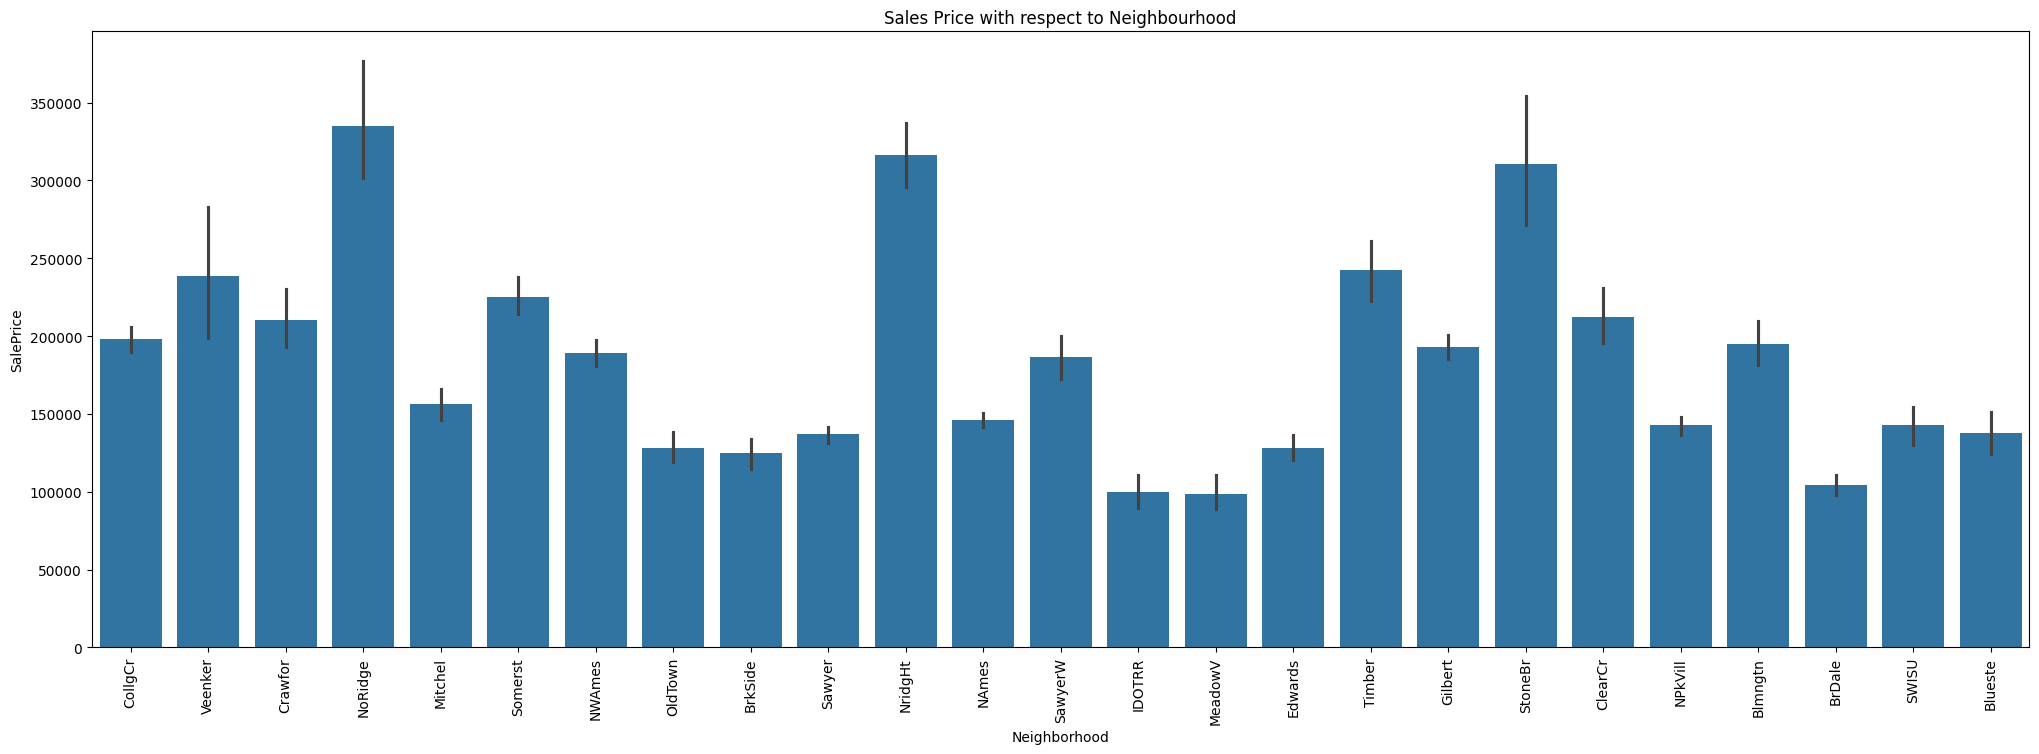

In [26]:
#### Plot 'SalesPrice' vs 'Neighborhood' ####
plt.figure(figsize=(25,8))
sns.barplot(x='Neighborhood', y='SalePrice', data=housedata) 
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

House prices are maximum in NoRidge, StoneBr and NridgHt

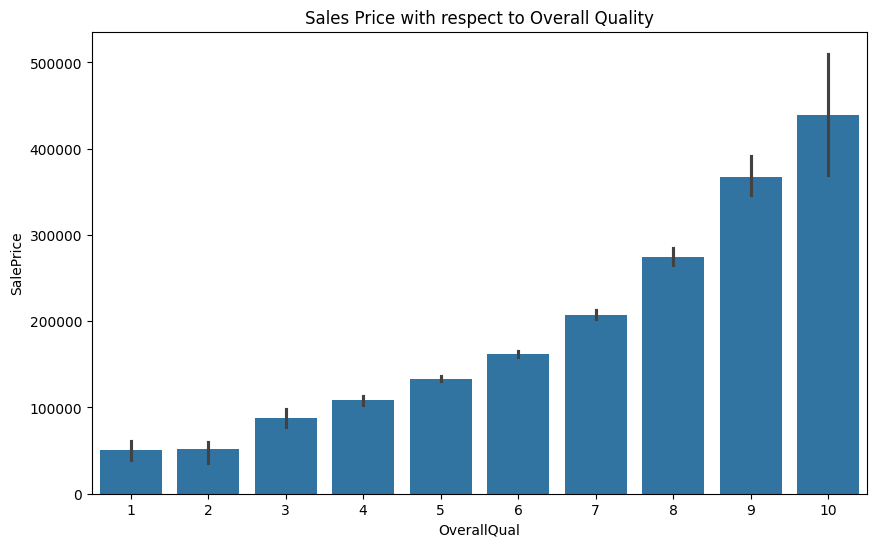

In [27]:
#### Plot 'Overall Qual' vs 'SalesPrice' ####
plt.figure(figsize=(10,6))
sns.barplot(x='OverallQual', y='SalePrice', data=housedata)
plt.title("Sales Price with respect to Overall Quality")
plt.show()

With increase in quality, there is a direct positive impact on Sale Price

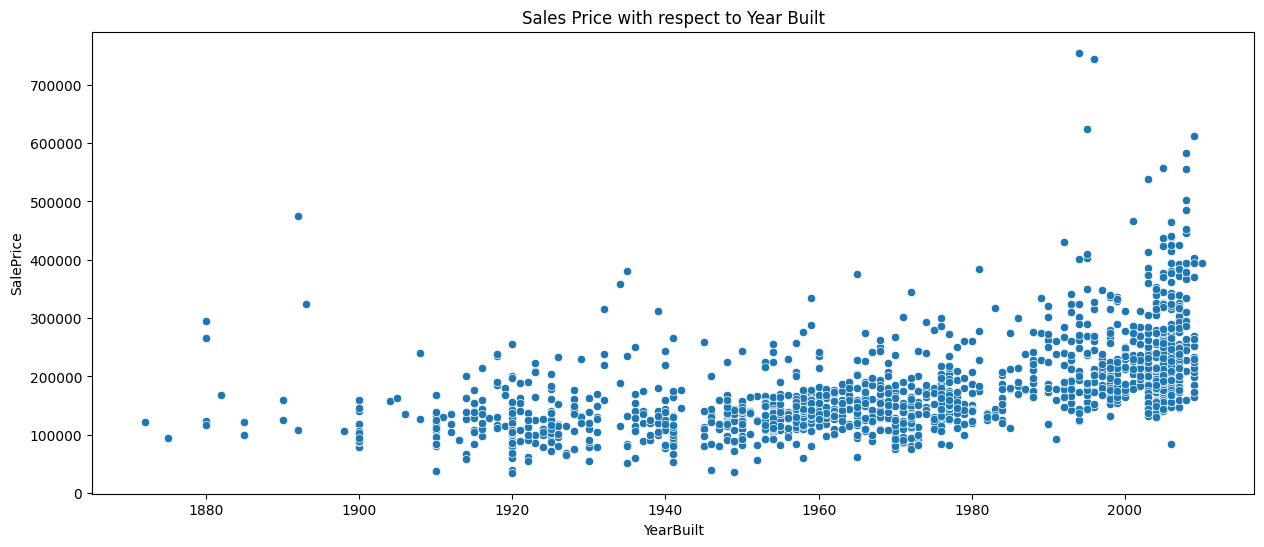

In [28]:
#### plot 'Year Built' vs 'SalesPrice' ####
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=housedata)
plt.title("Sales Price with respect to Year Built") 
plt.show()

we can see a pattern of steady rise in Saleprice as the year progresses.

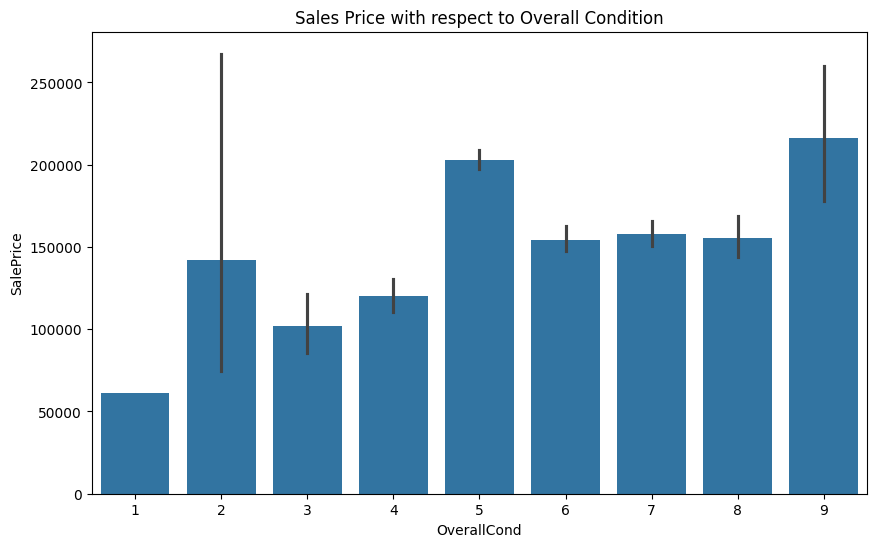

In [29]:
#### Plot 'Overall Cond' vs 'SalesPrice' ####
plt.figure(figsize=(10,6))
sns.barplot(x='OverallCond', y='SalePrice', data=housedata)
plt.title("Sales Price with respect to Overall Condition")
plt.show()

In [30]:
#### Correlation on the numeric columns ####
corr_matrix = housedata[numeric_col].corr()
corr_matrix


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


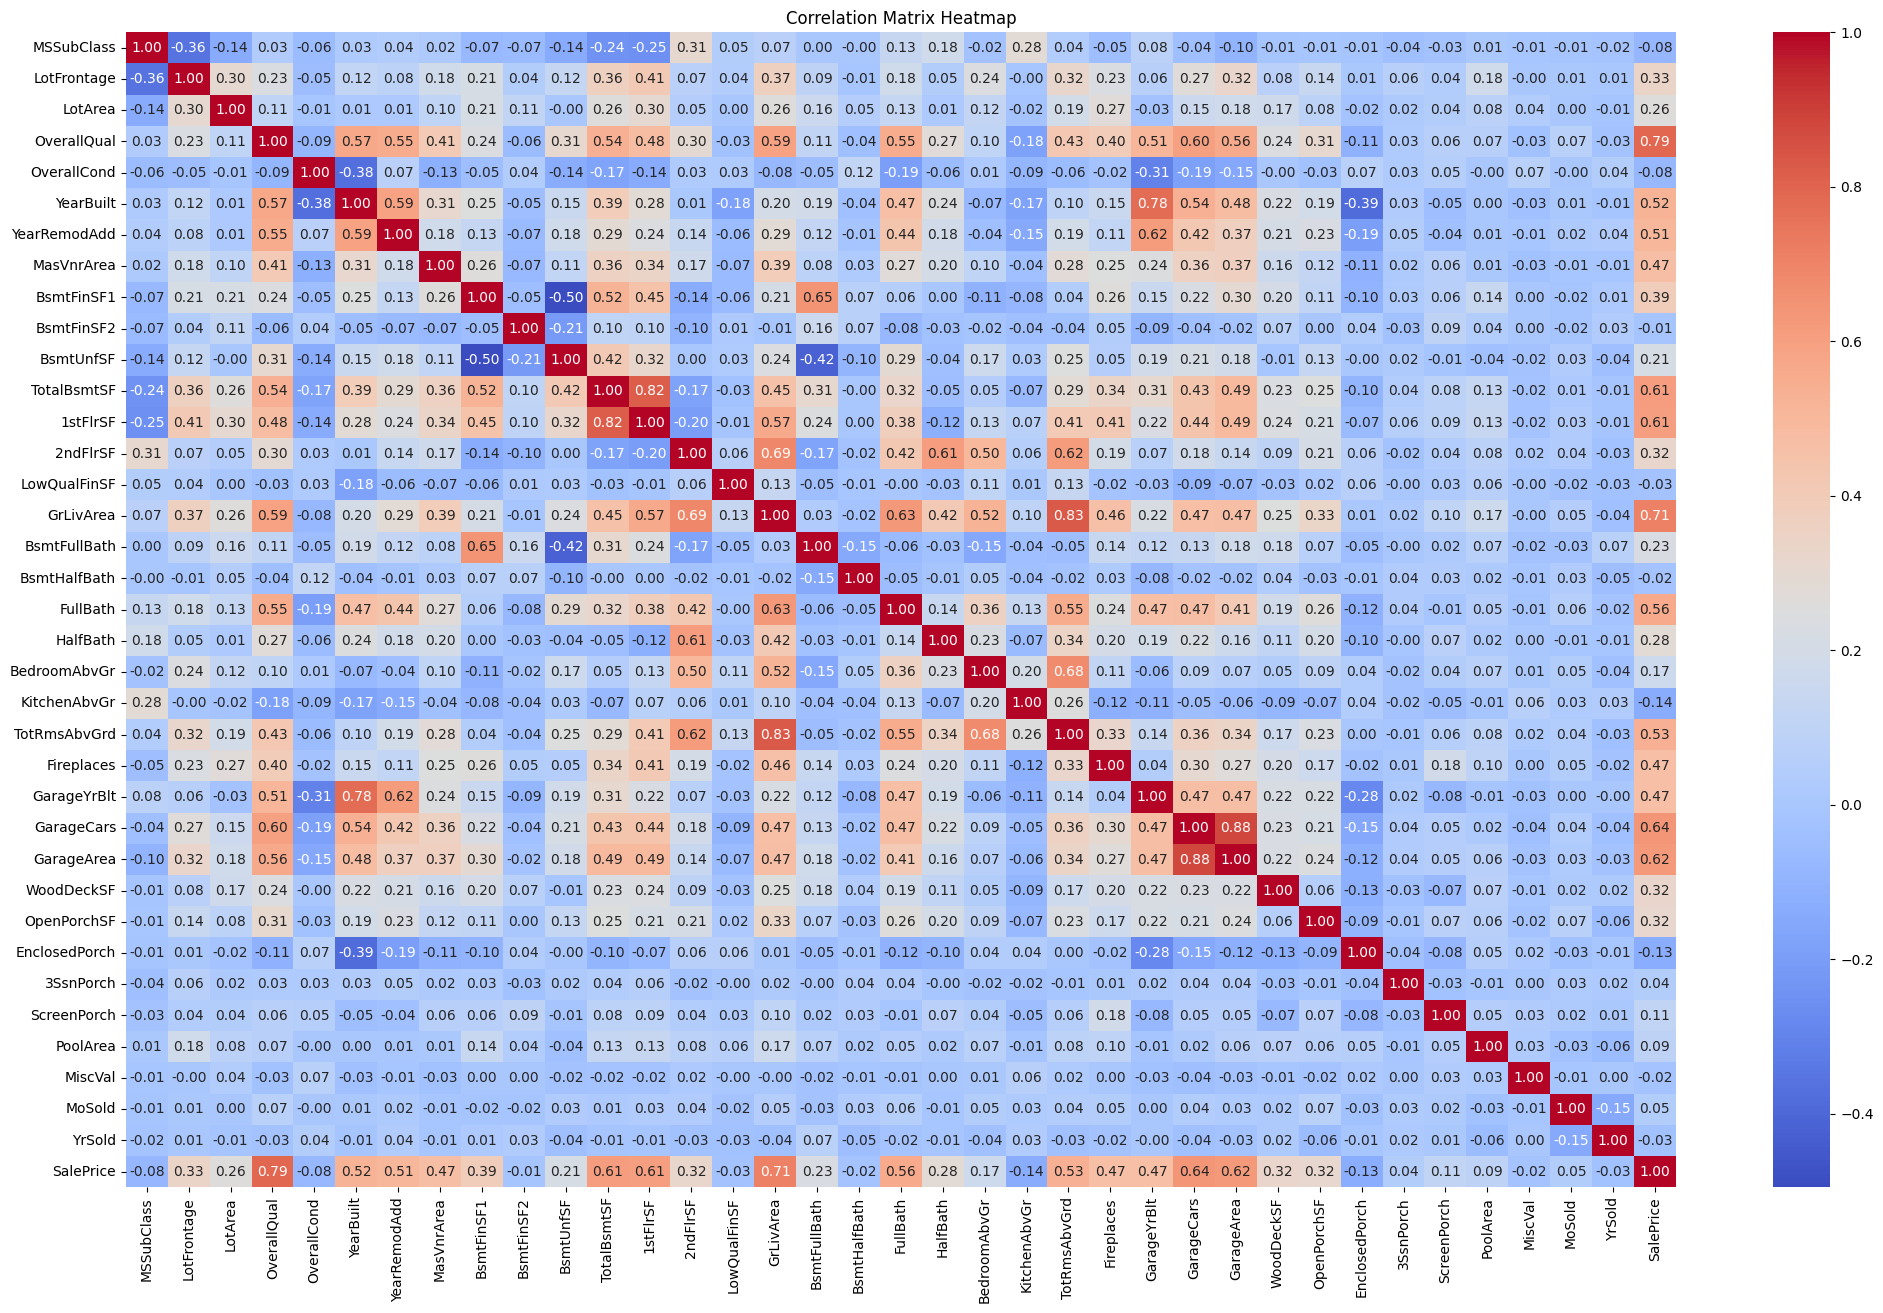

In [31]:
#### heatmap for correlation matrix ####
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

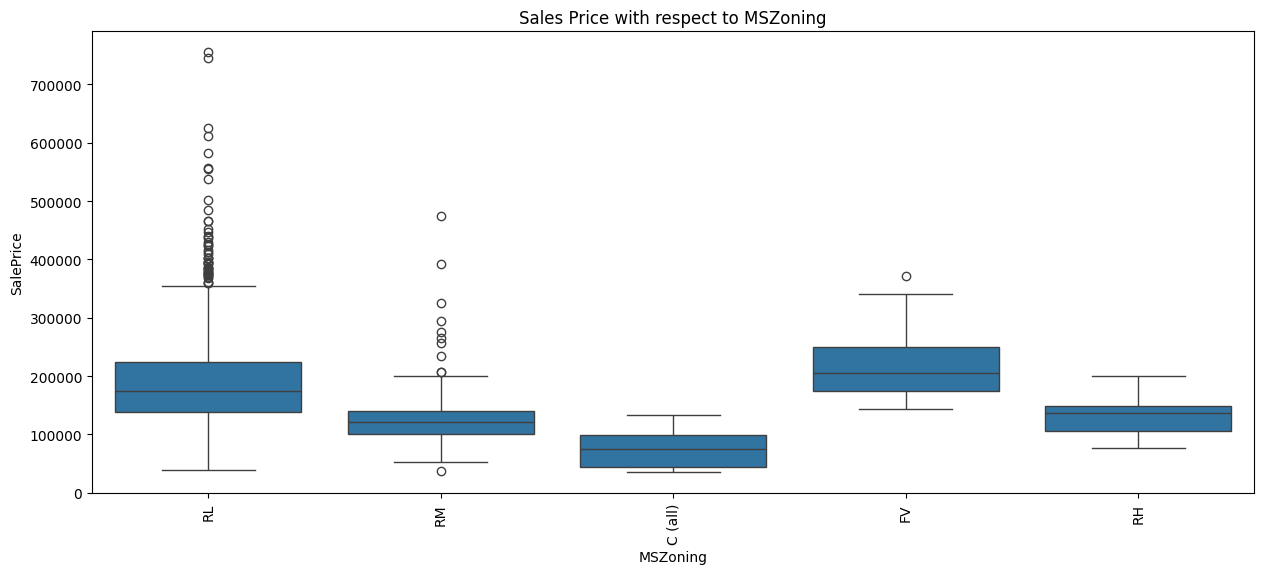

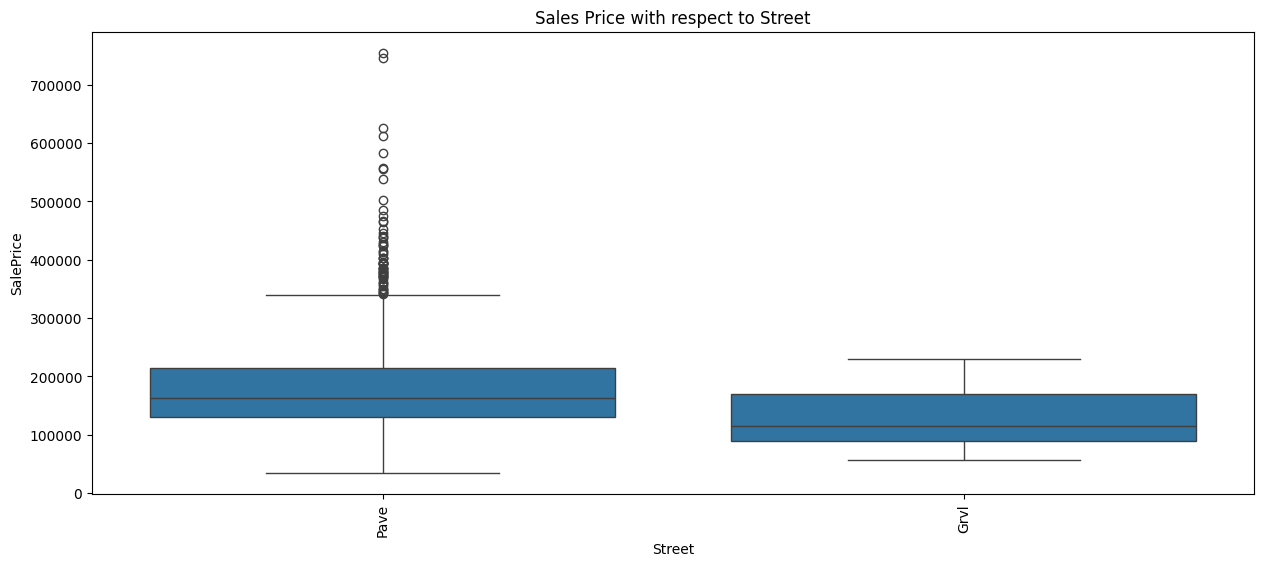

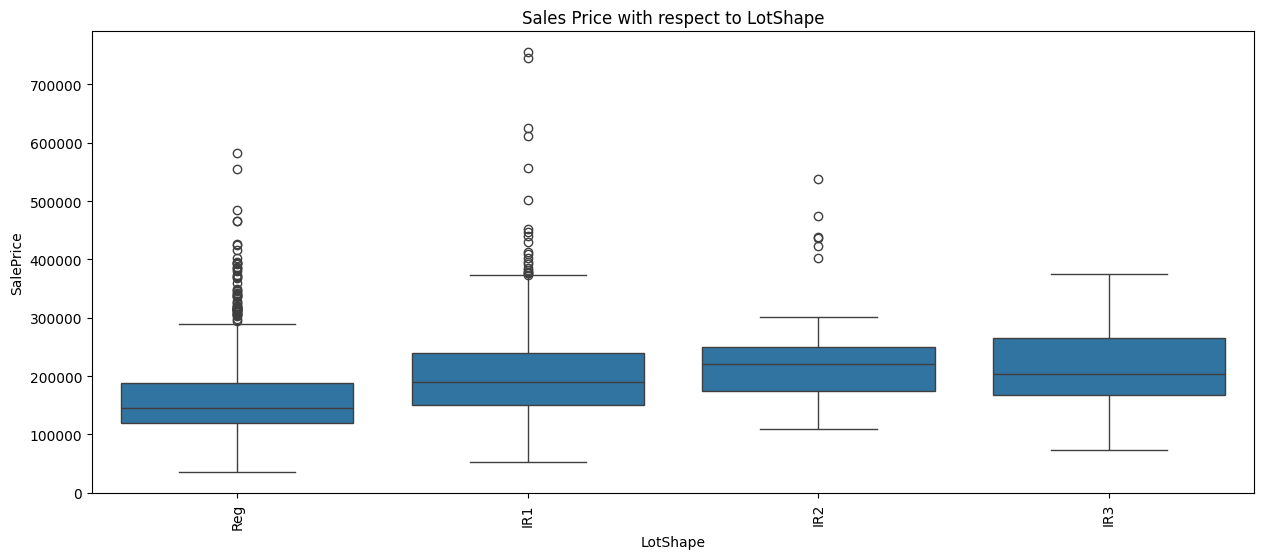

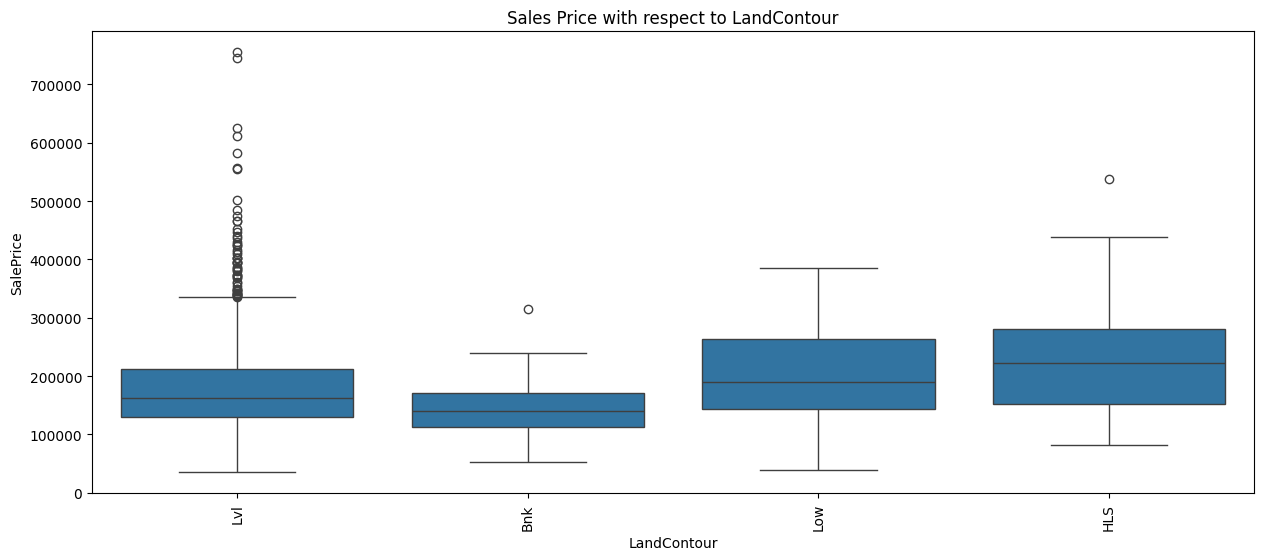

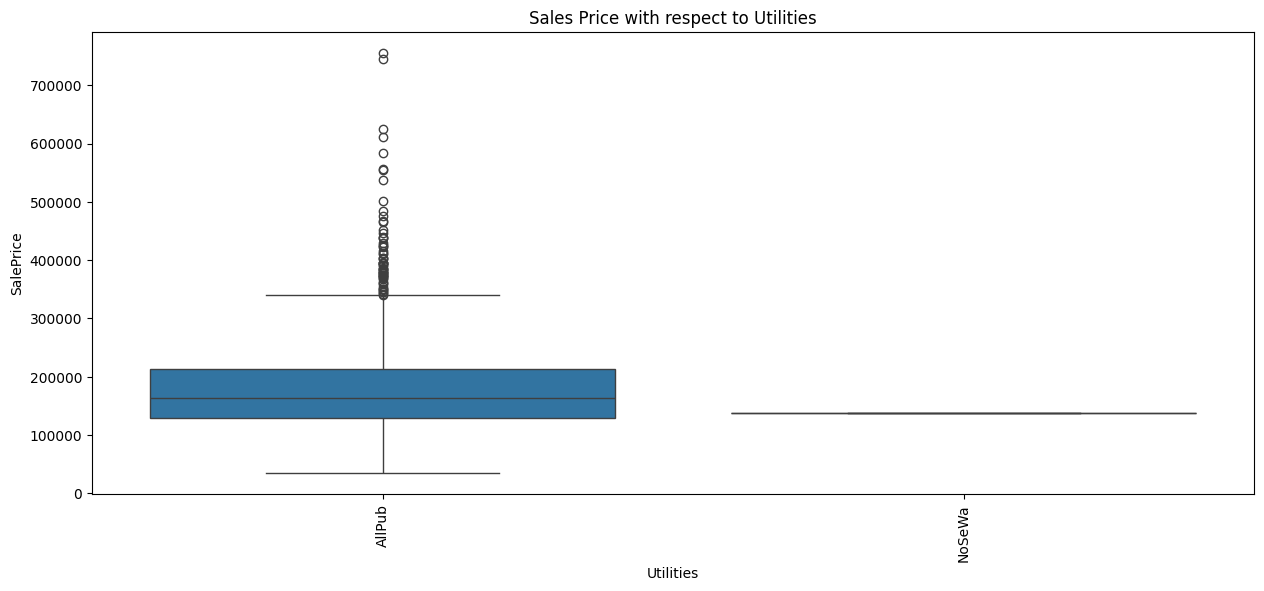

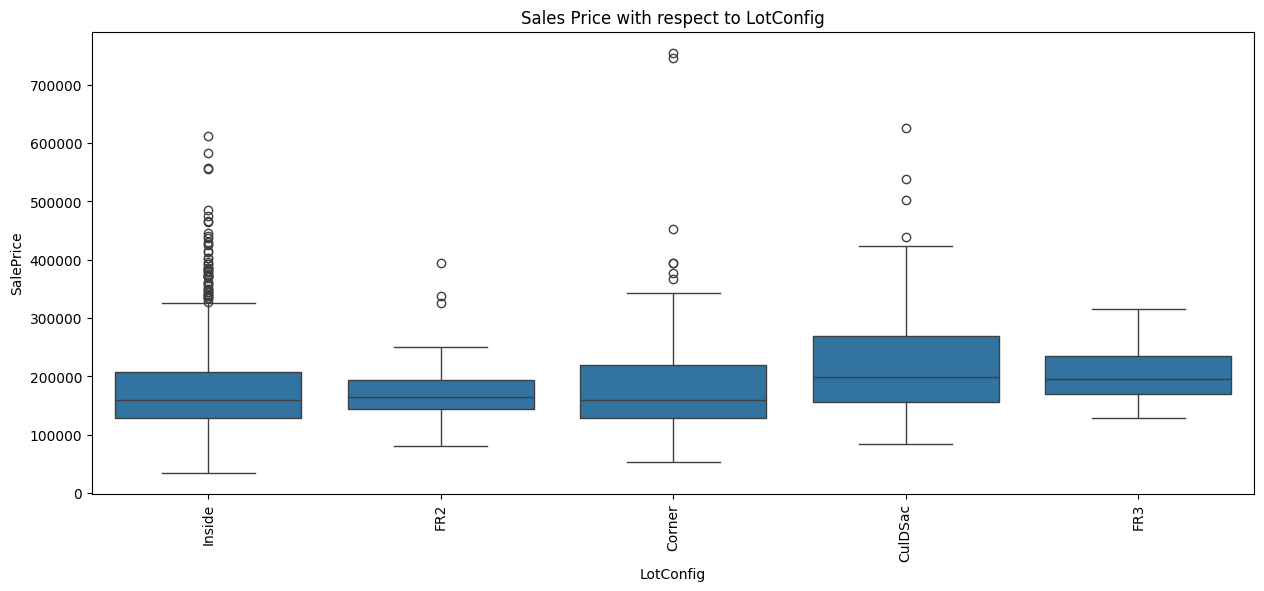

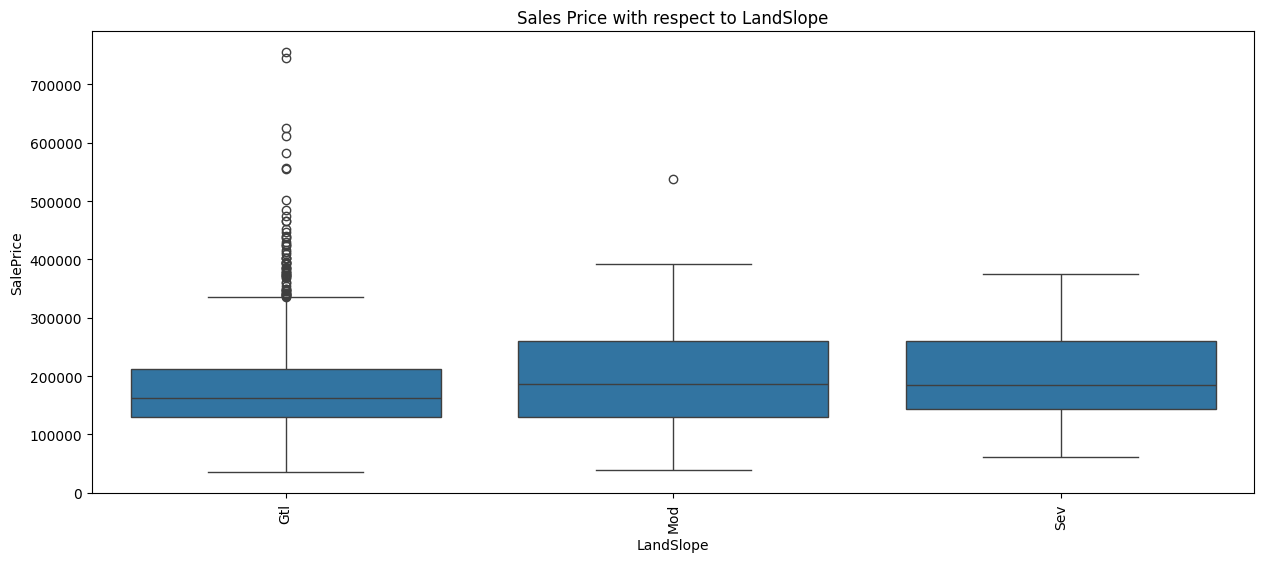

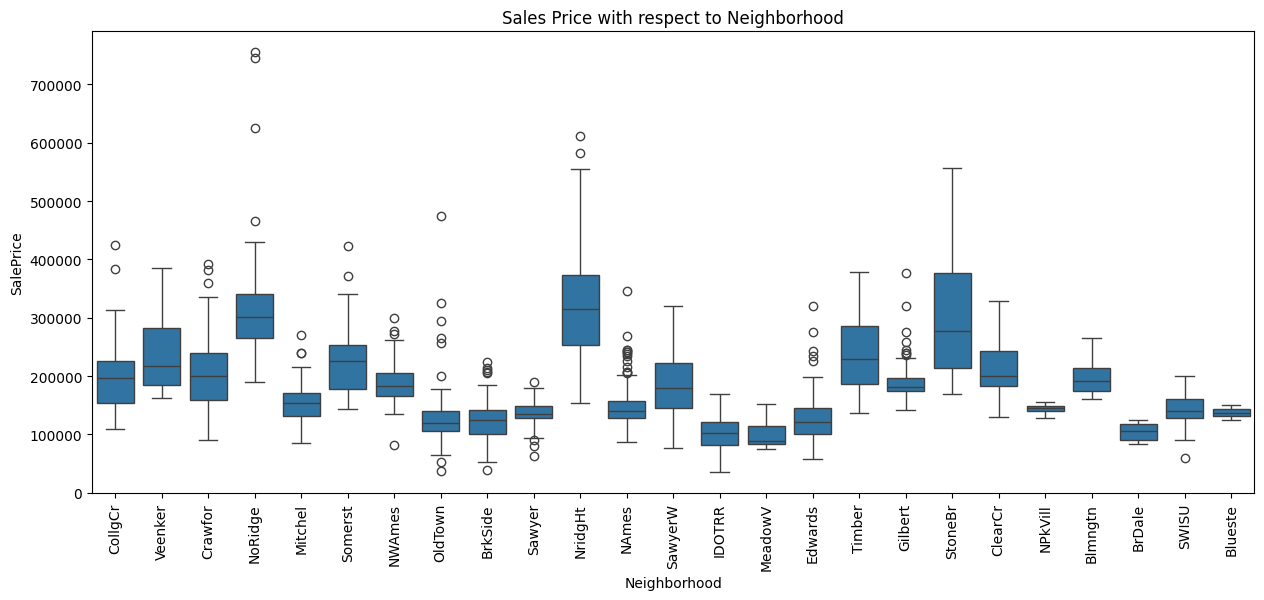

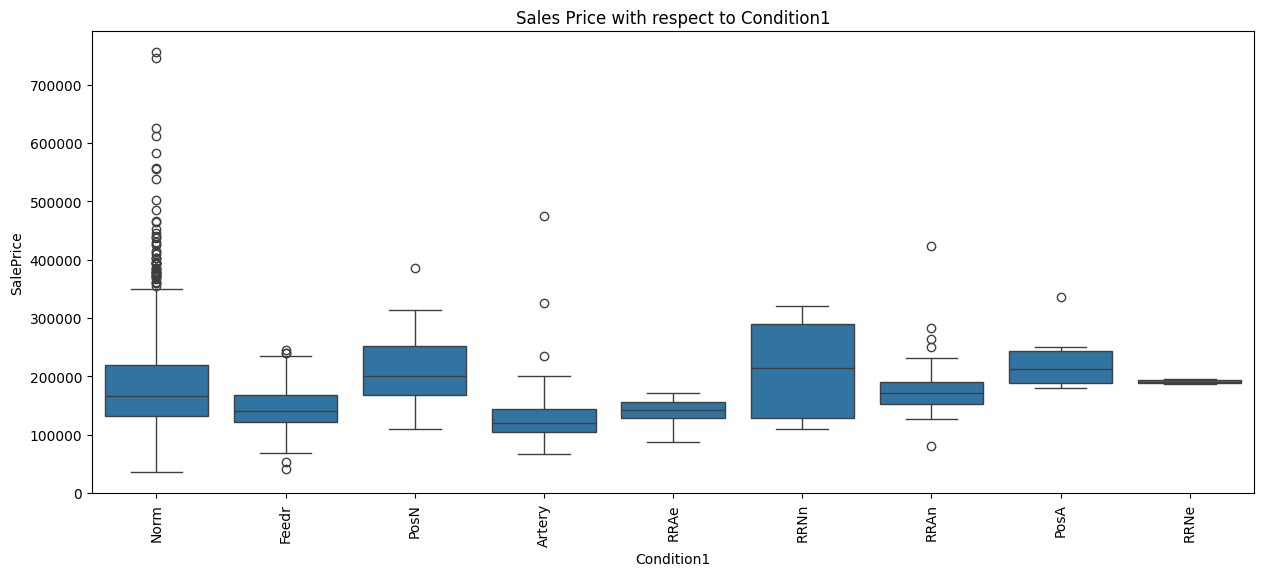

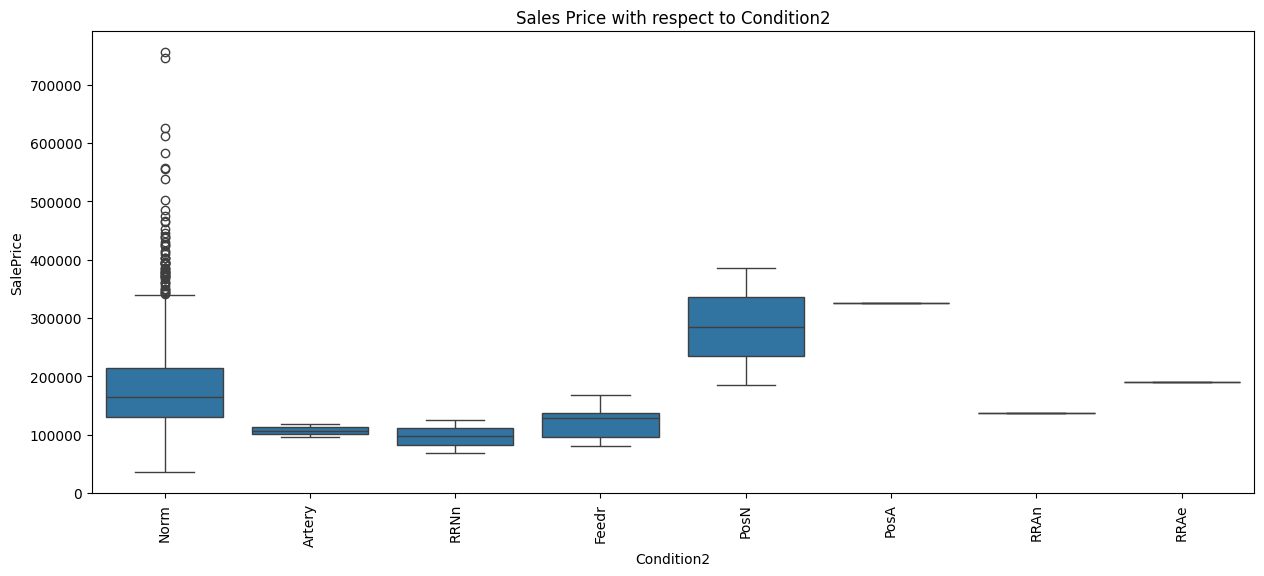

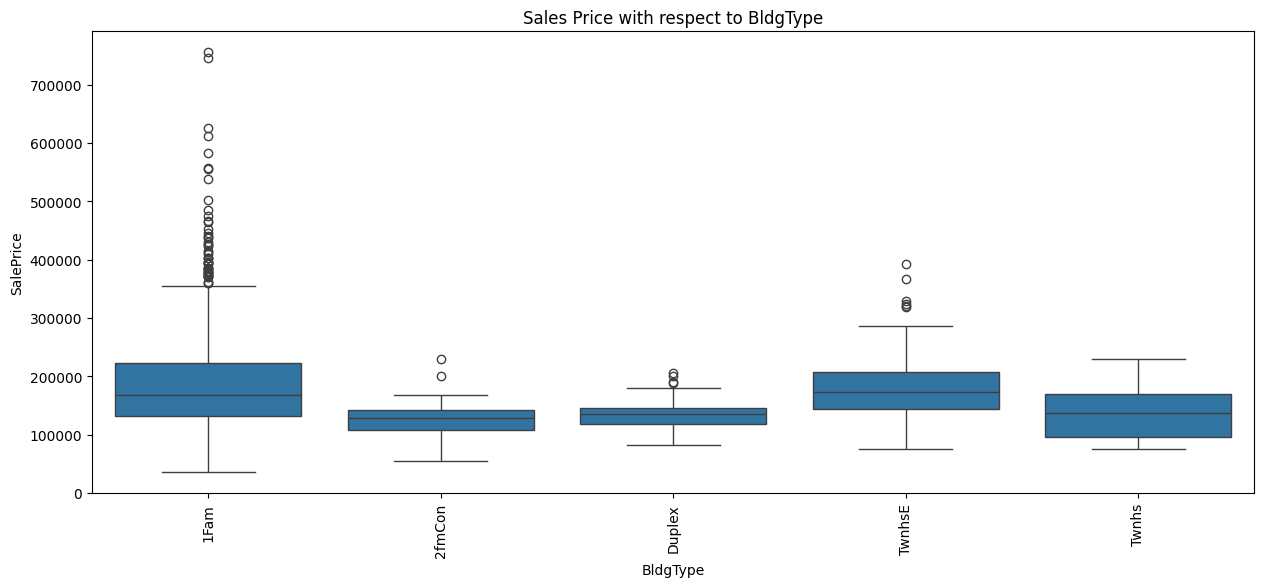

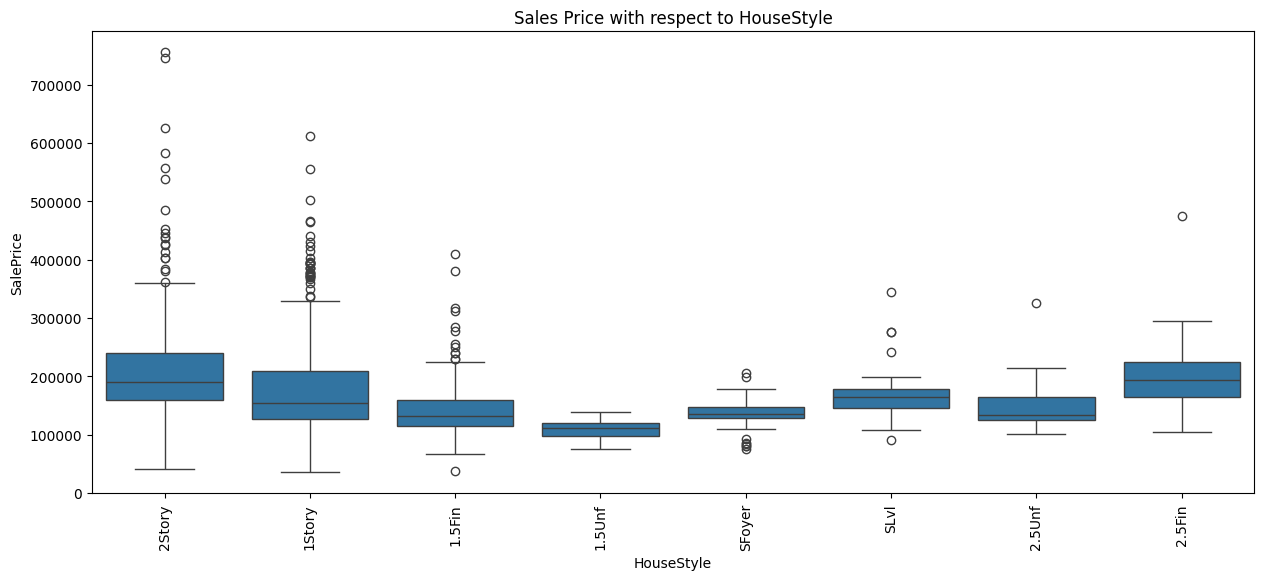

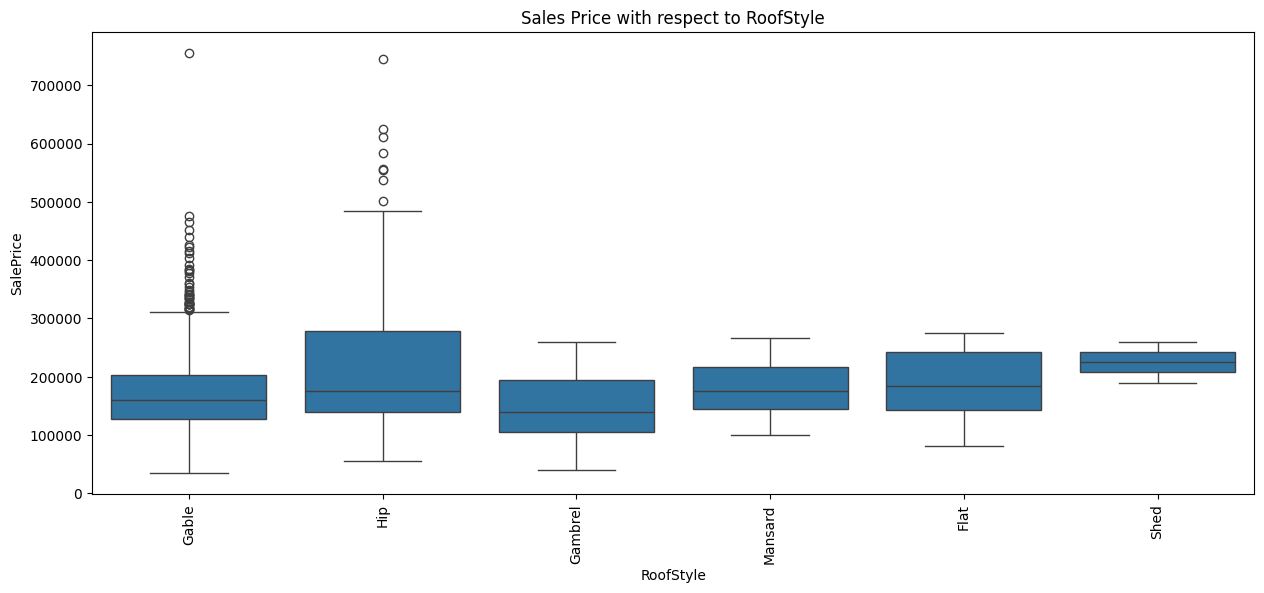

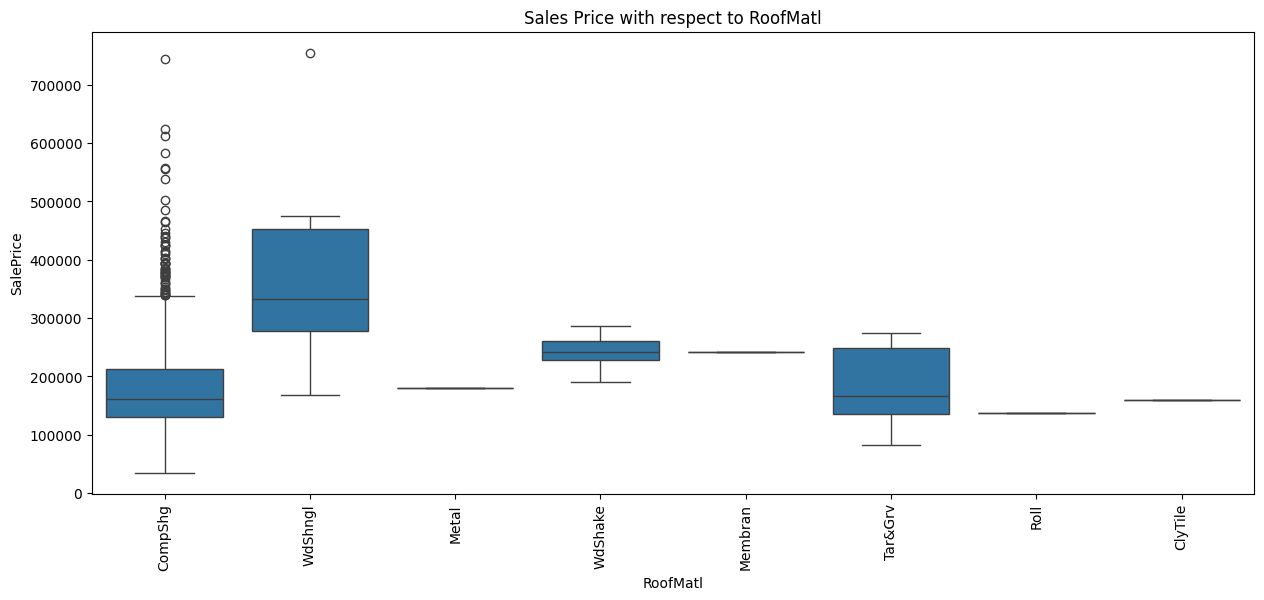

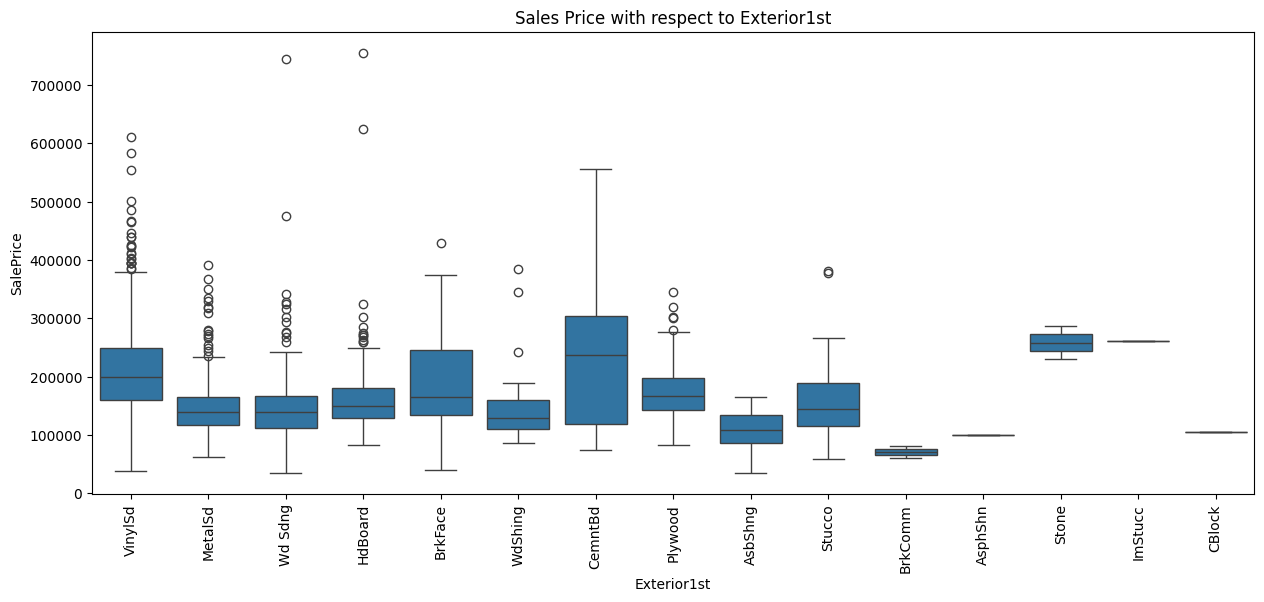

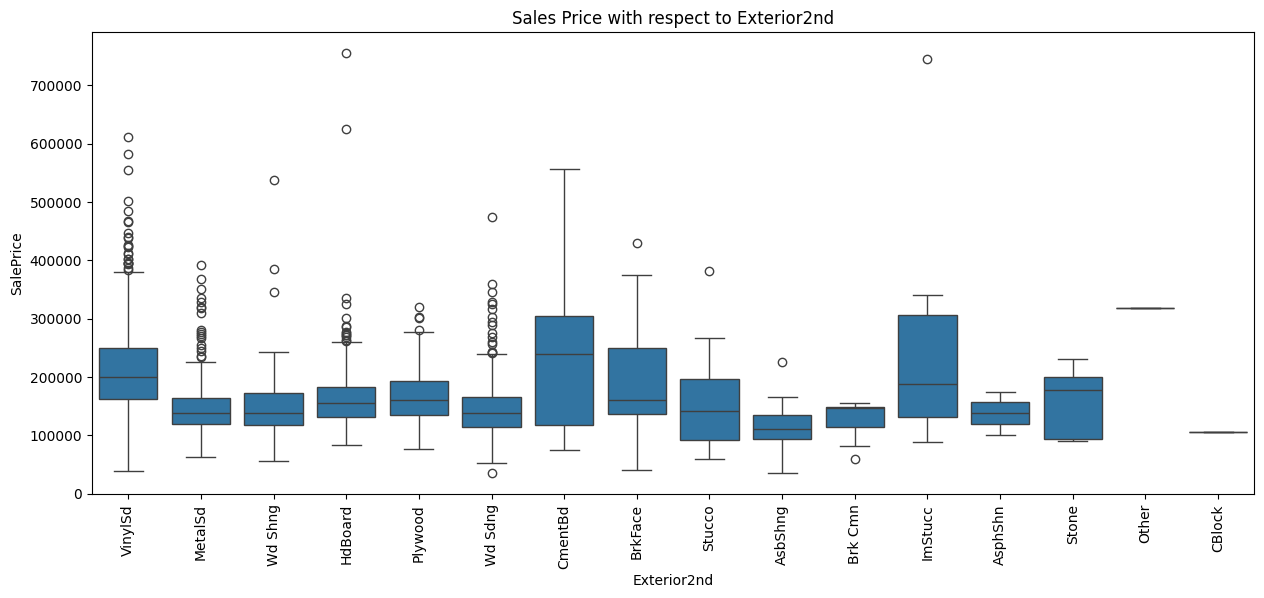

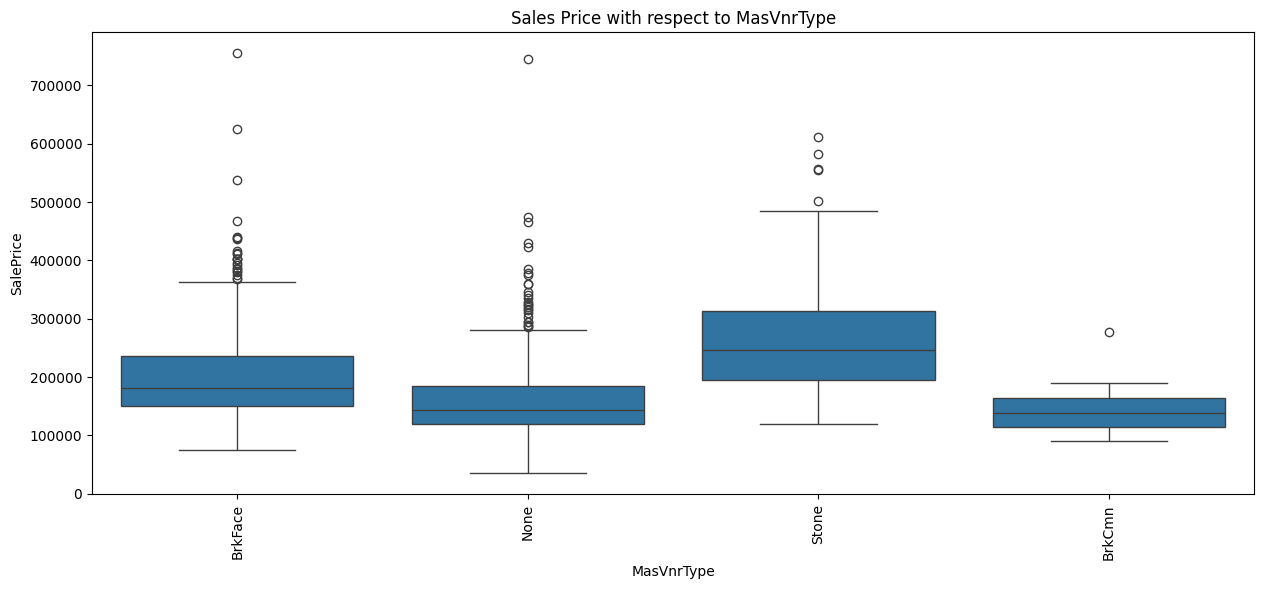

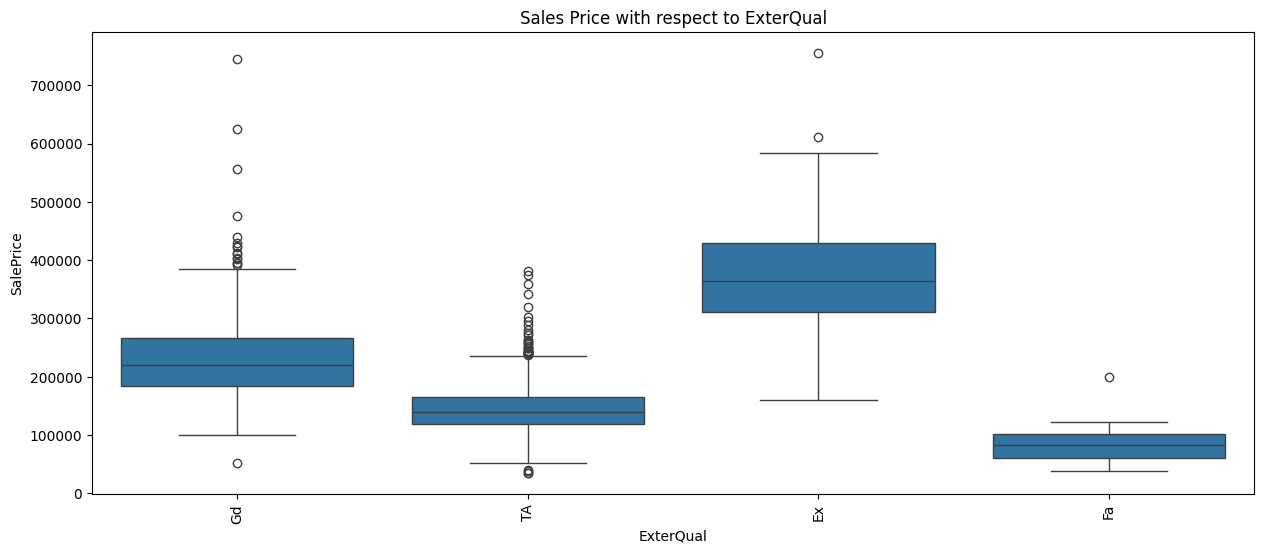

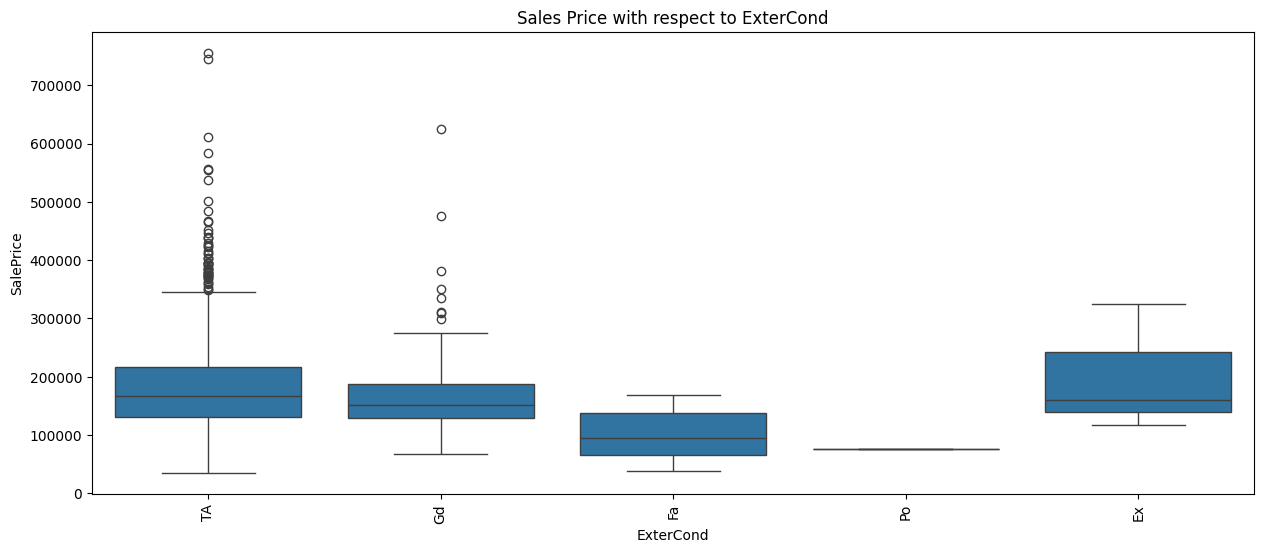

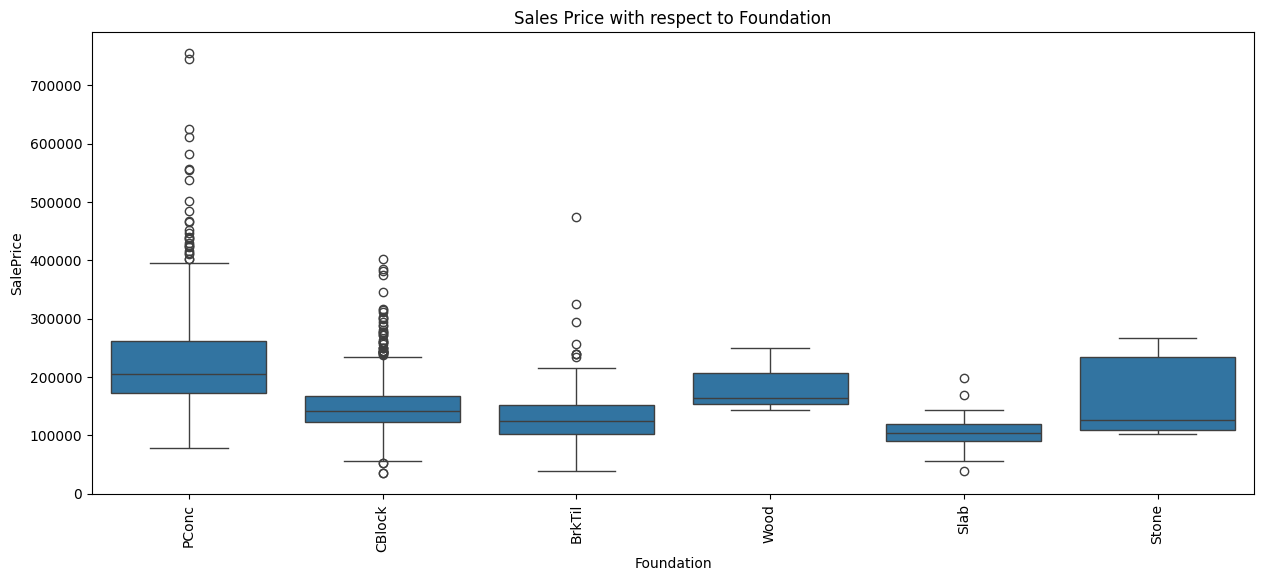

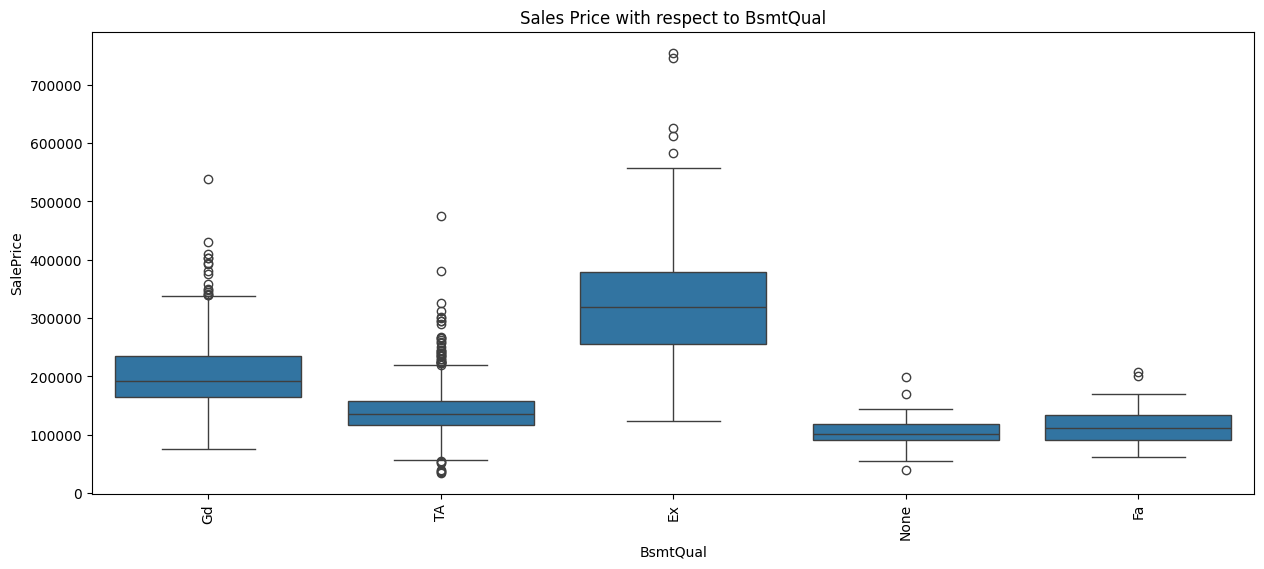

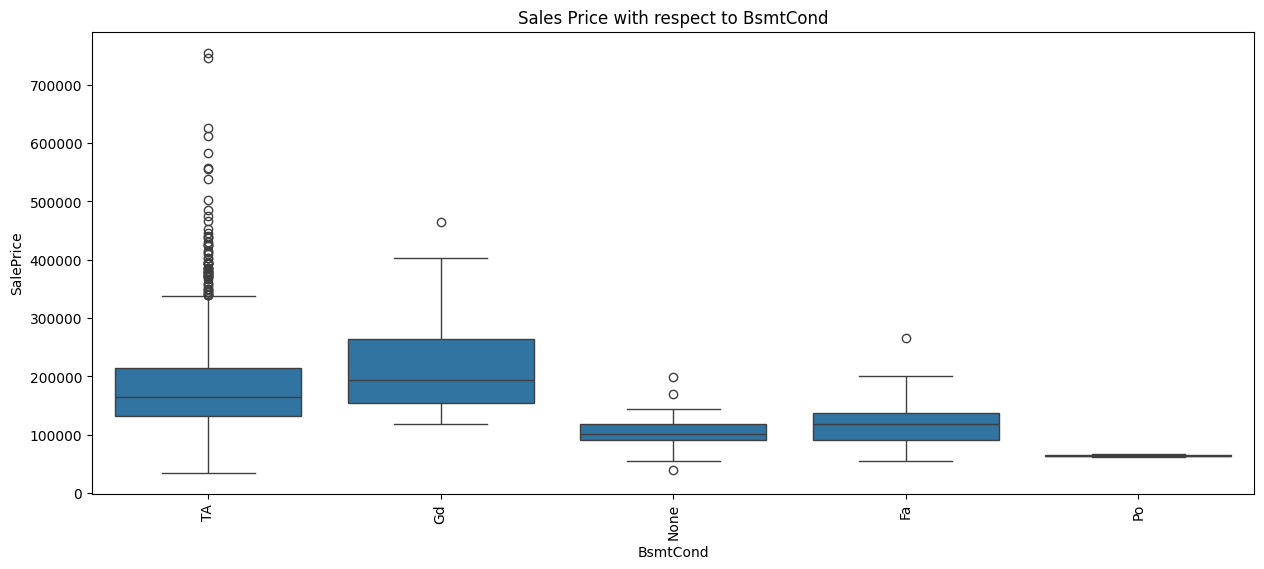

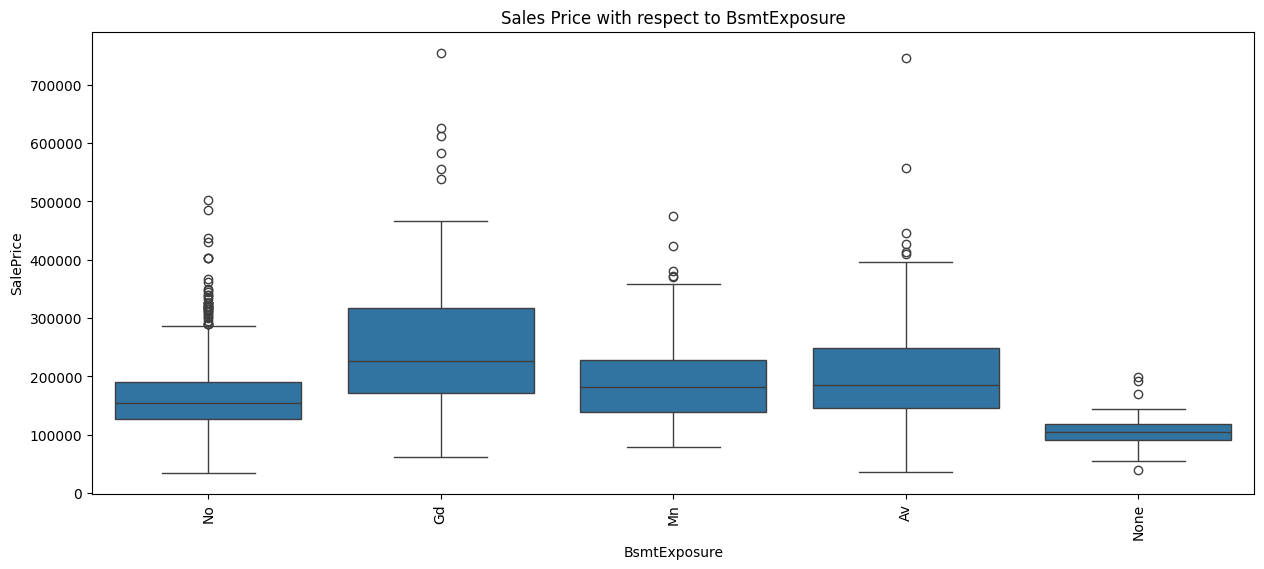

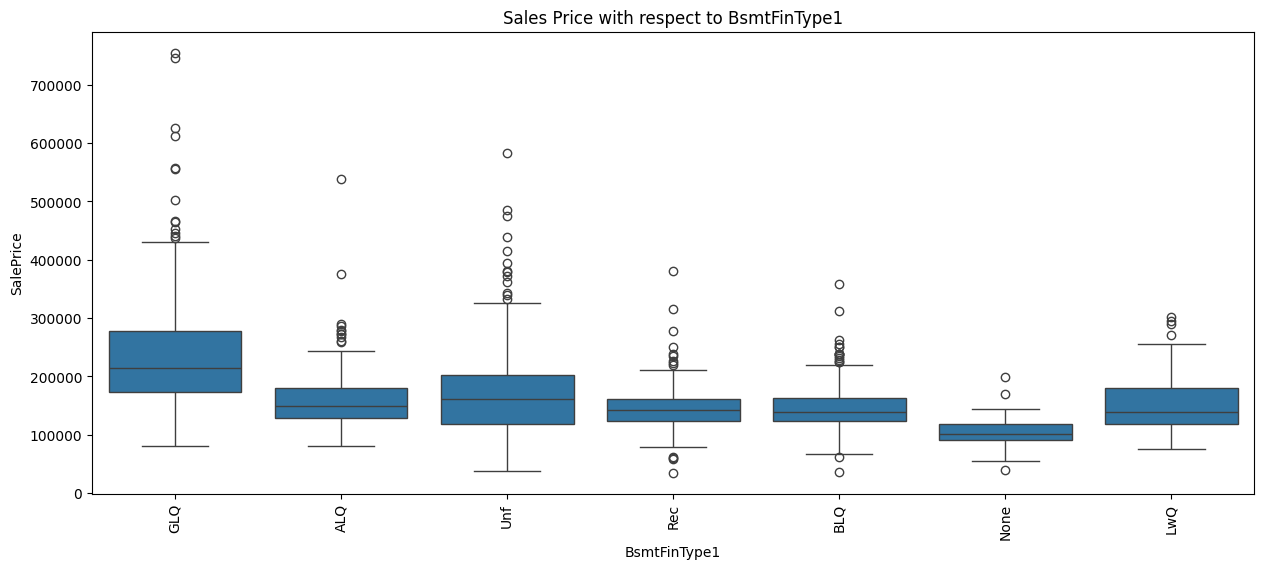

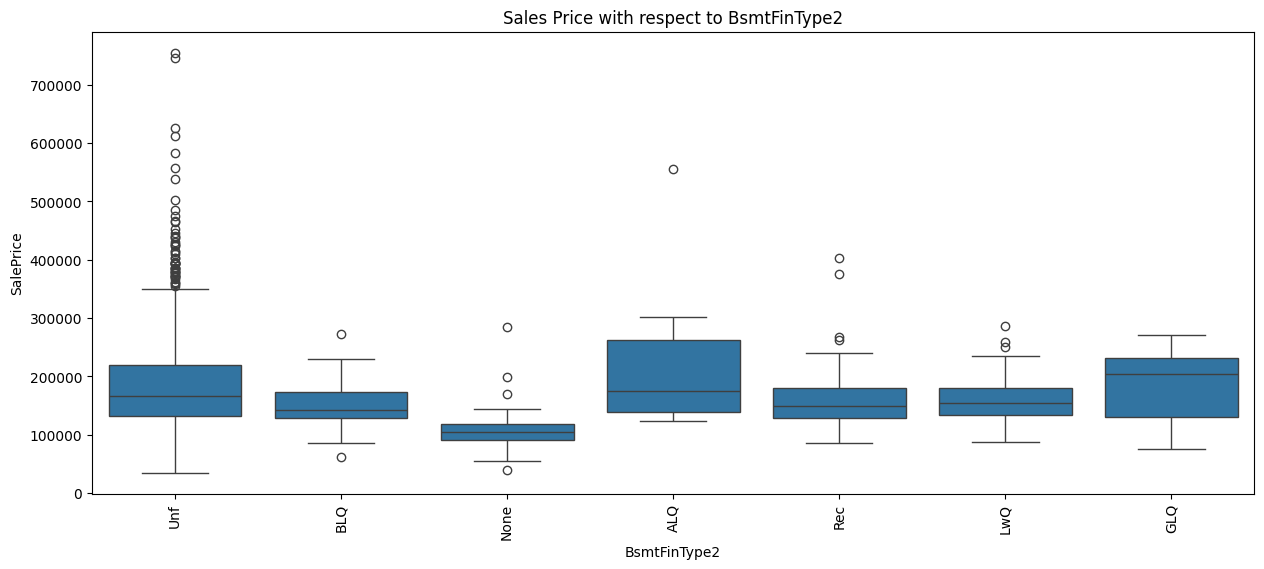

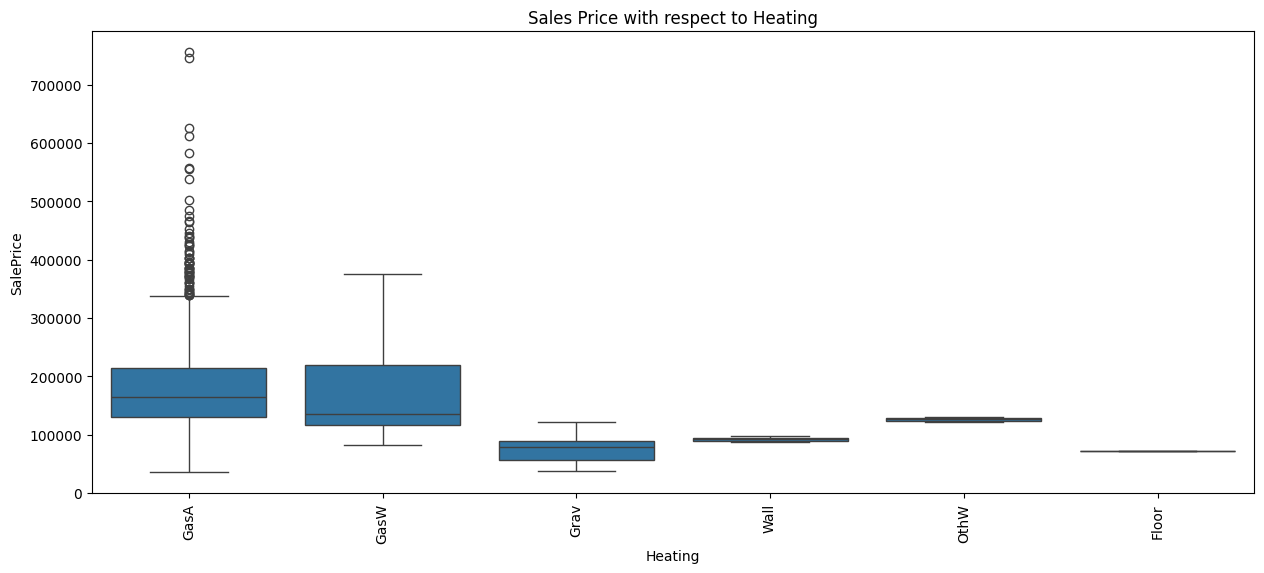

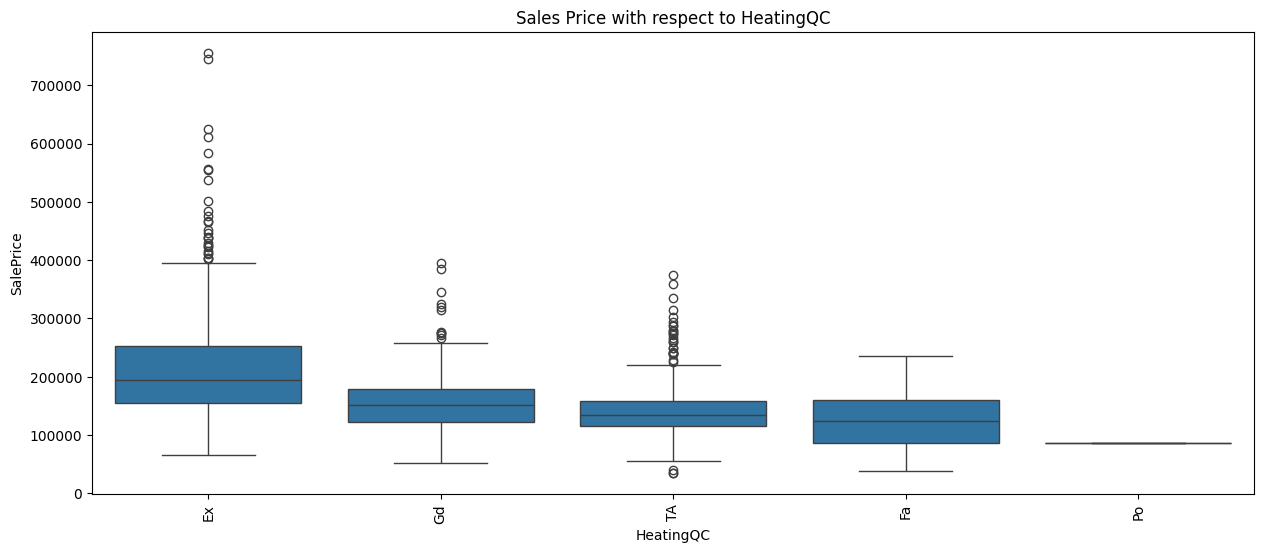

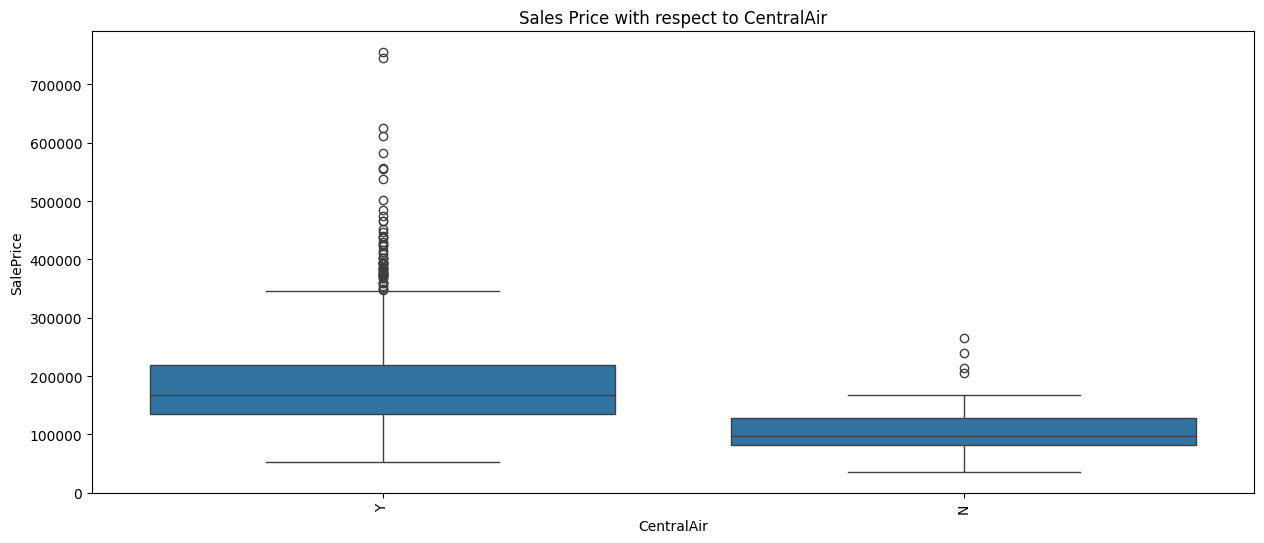

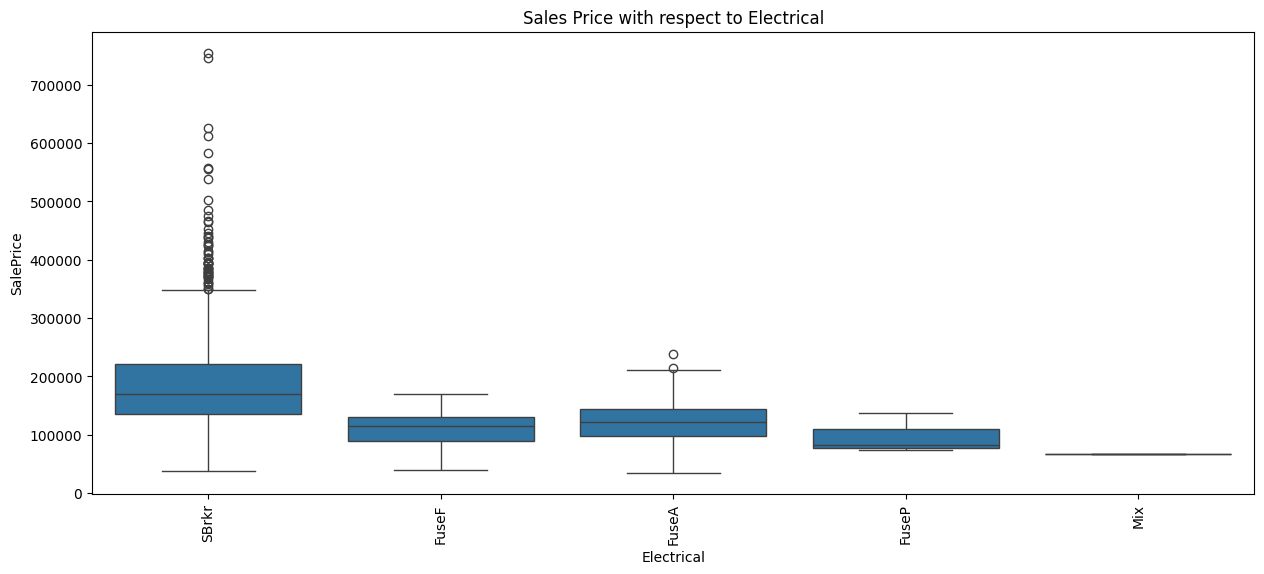

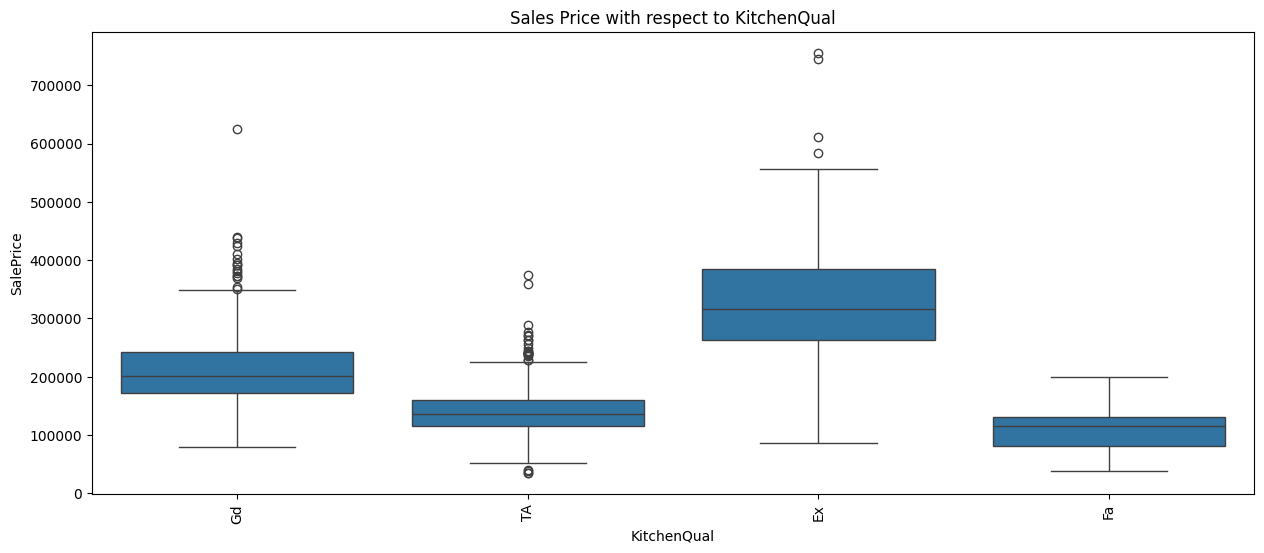

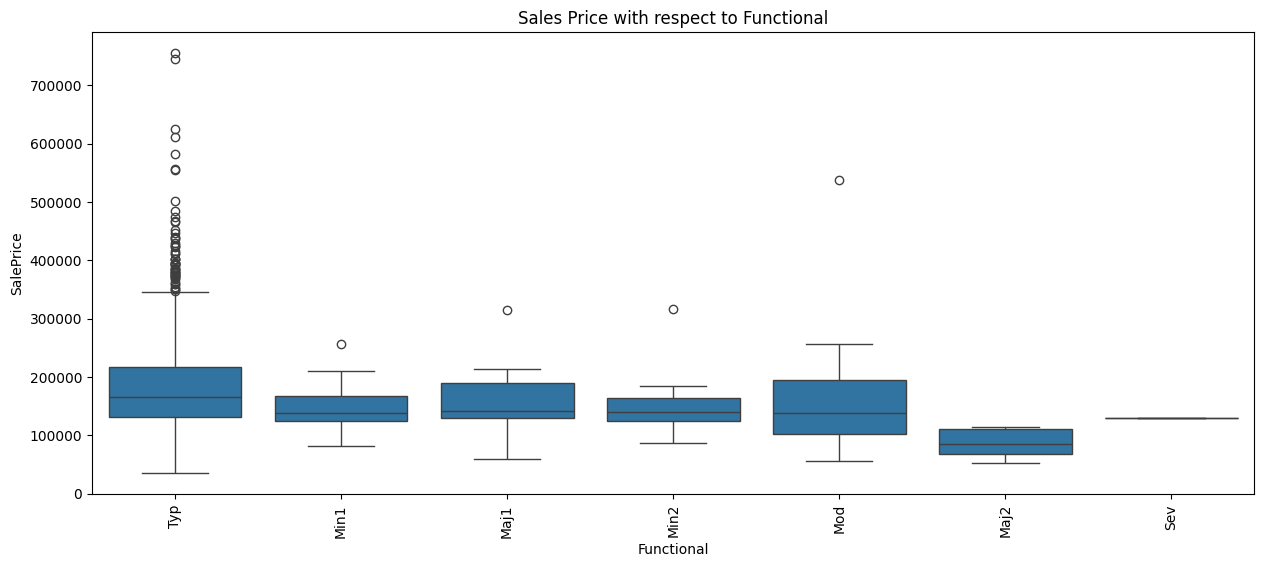

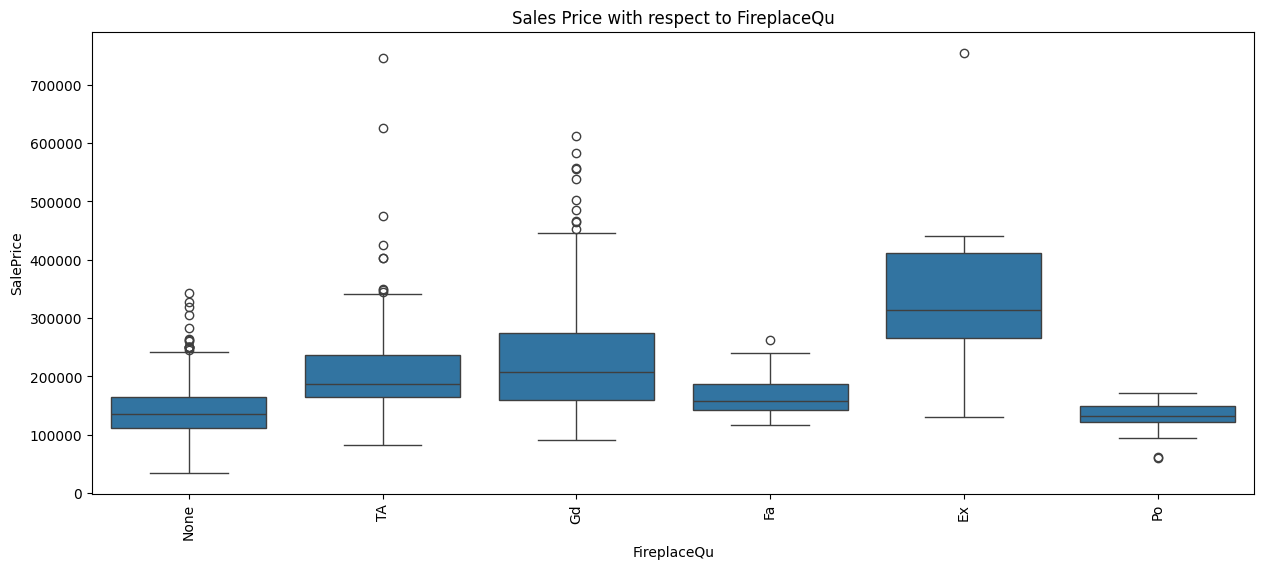

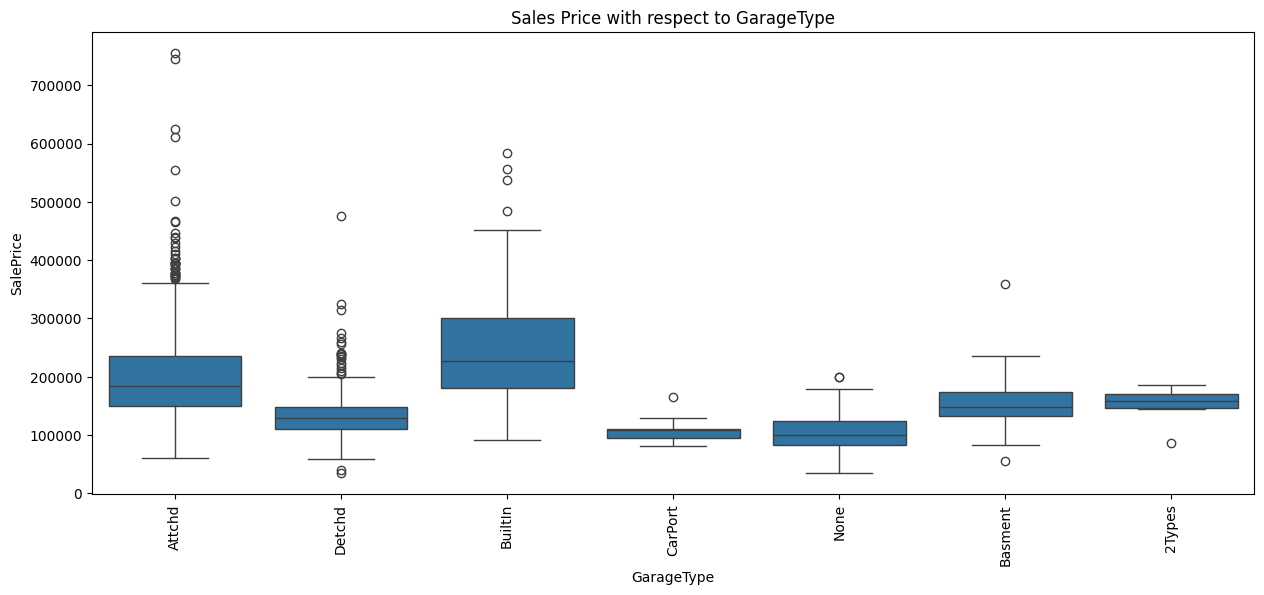

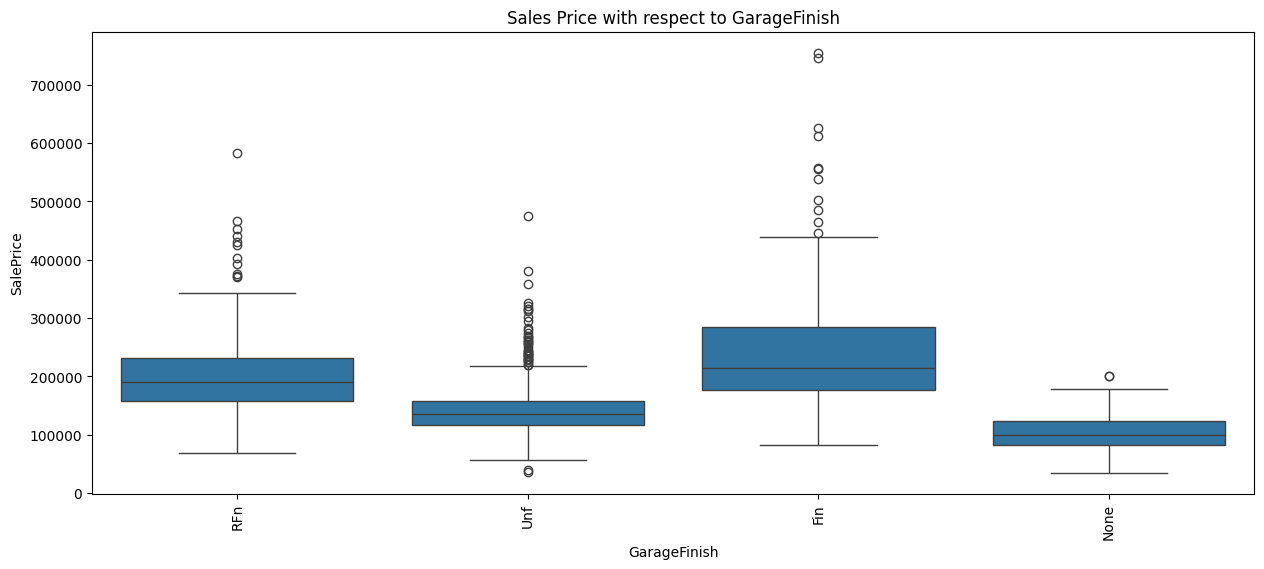

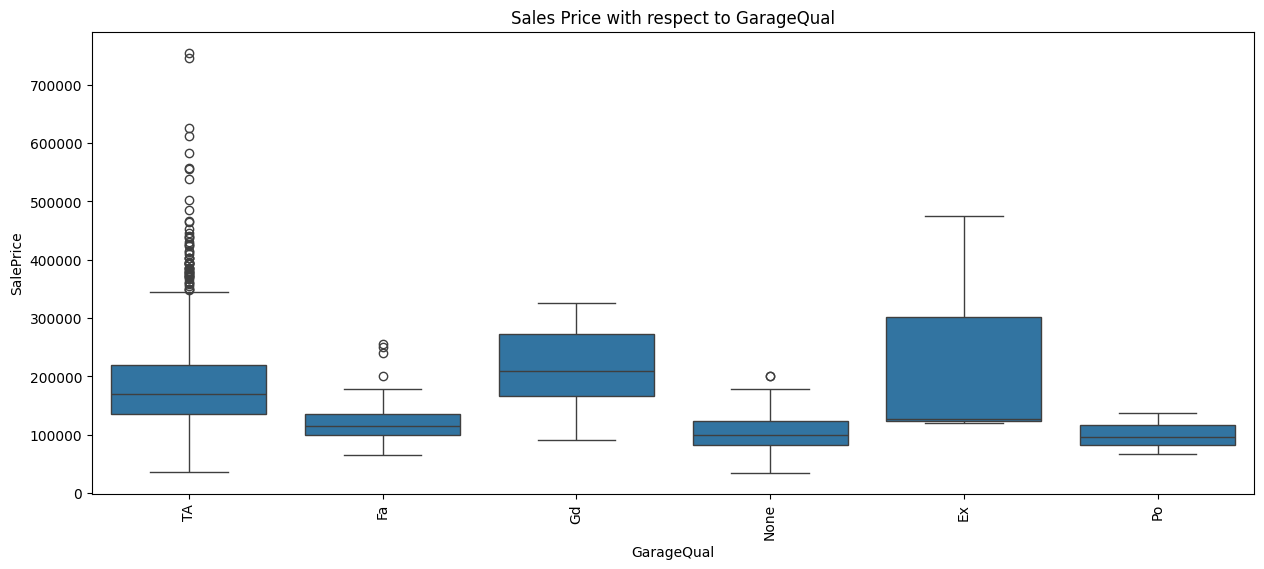

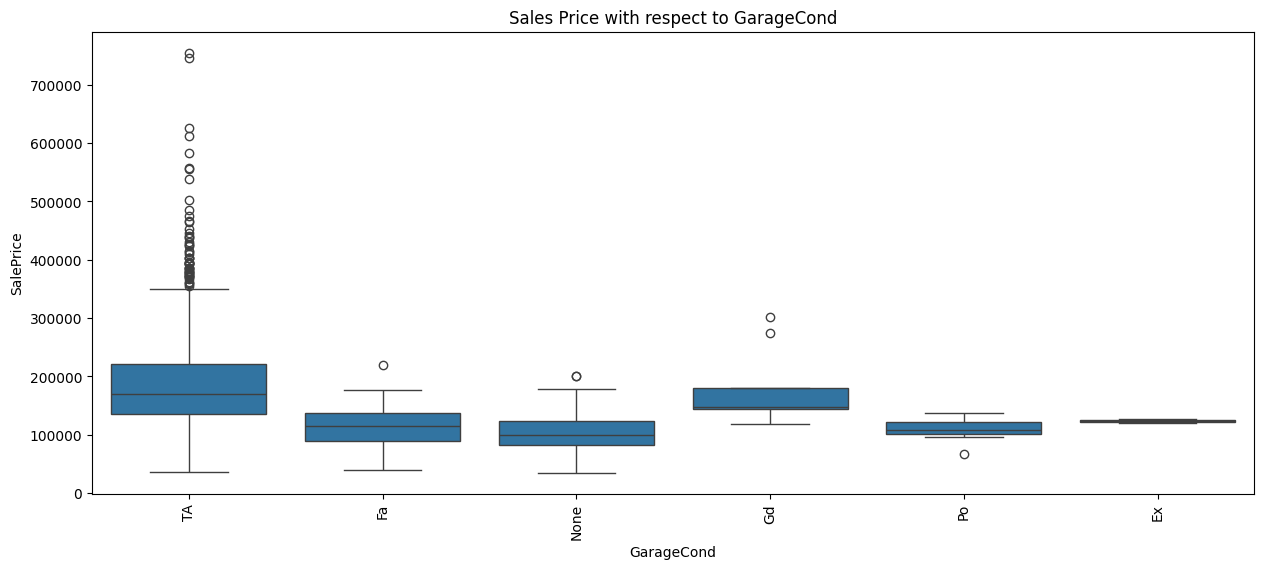

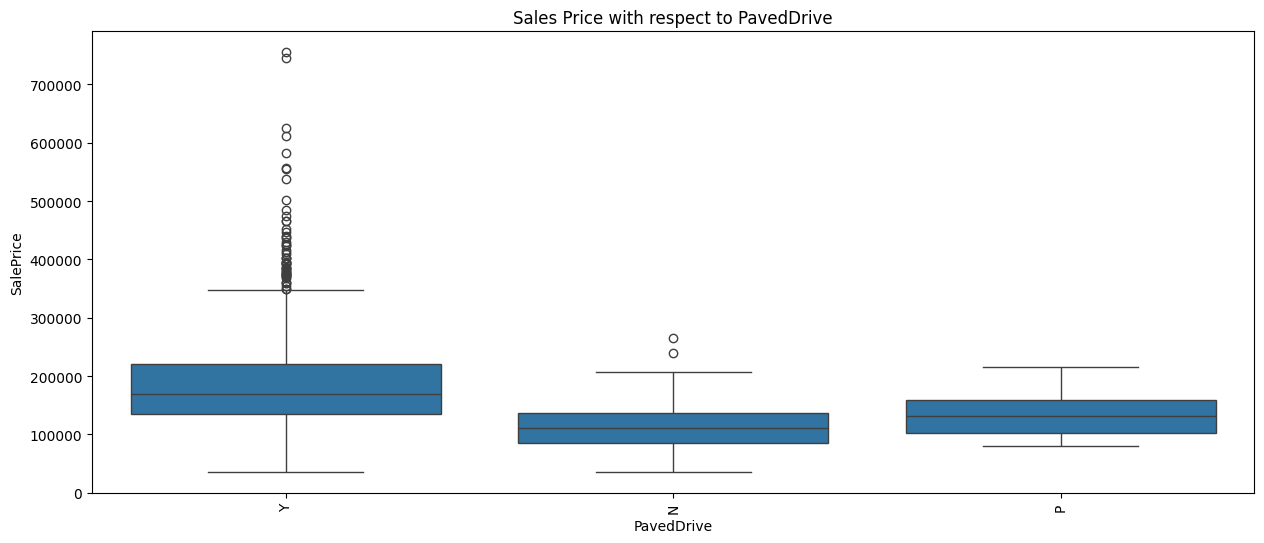

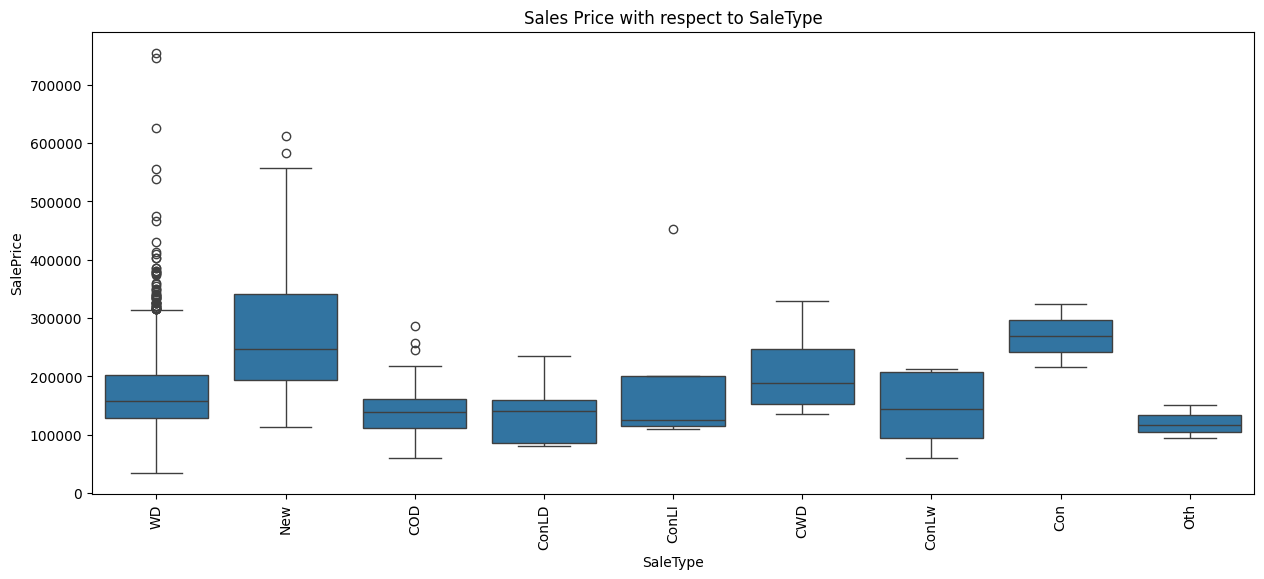

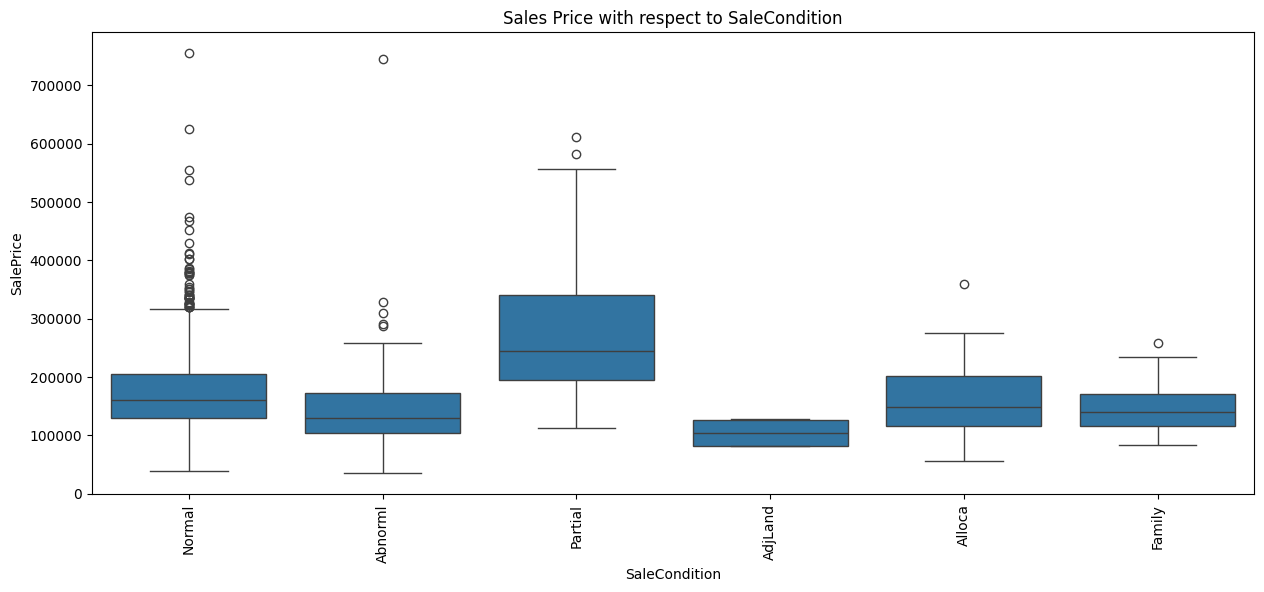

In [32]:
#### Lets Plot Categorial columns vs SalesPrice ####
for col in categoric_col:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=col, y='SalePrice', data=housedata)
    plt.title(f"Sales Price with respect to {col}")
    plt.xticks(rotation=90)
    plt.show()

Looks like some variables are correlated. Check if they have any impacts.

In [33]:
#### Derive Property_Age from YearBuilt and Year Sold ####
housedata['Property_Age'] = housedata['YrSold'] - housedata['YearBuilt']
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,8


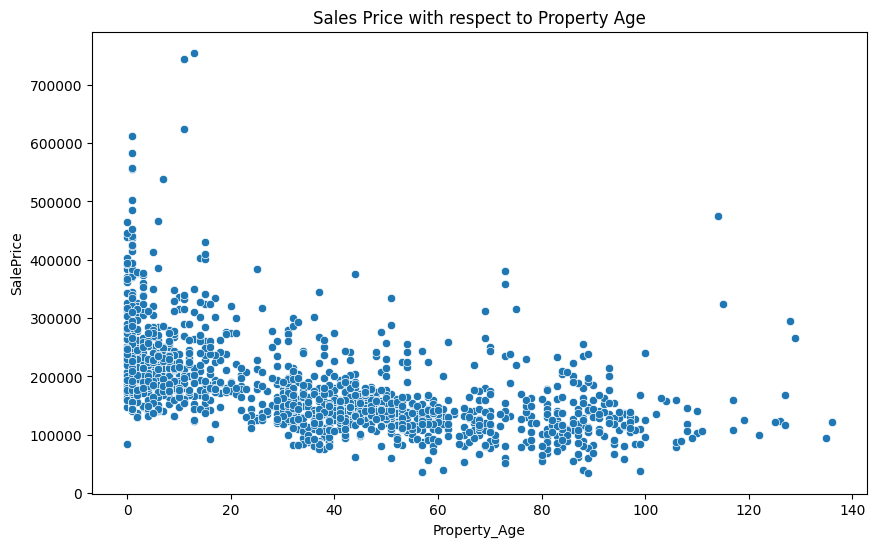

In [34]:
#### Scatter plot of Property_Age vs SalePrice ####
plt.figure(figsize=(10,6))
sns.scatterplot(x='Property_Age', y='SalePrice', data=housedata)
plt.title("Sales Price with respect to Property Age")
plt.show()

As the Property Age increases, Sales Price decreases which means Newer the Property, Higher the Sales Price.

In [35]:
#### lets Drop Year and month related columns as we have derived Property_Age column ####
housedata.drop(columns=['YearBuilt', 'YrSold','MoSold','YearRemodAdd','GarageYrBlt'], inplace=True)

In [36]:
#### Get the Categorical columns ####
categoric_col = housedata.select_dtypes(include=['object']).columns.tolist()
len(categoric_col)

39

In [37]:
#### get all Categorical columns with low variance ####
low_variance_cols = []
for col in categoric_col:
    value_counts = housedata[col].value_counts(normalize=True)
    if value_counts.iloc[0] > 0.9:
        low_variance_cols.append(col)
        print(f"Column '{col}' has low variance with {value_counts.iloc[0]*100:.2f}% of values in one category.")

Column 'Street' has low variance with 99.59% of values in one category.
Column 'Utilities' has low variance with 99.93% of values in one category.
Column 'LandSlope' has low variance with 94.66% of values in one category.
Column 'Condition2' has low variance with 98.97% of values in one category.
Column 'RoofMatl' has low variance with 98.22% of values in one category.
Column 'Heating' has low variance with 97.81% of values in one category.
Column 'CentralAir' has low variance with 93.49% of values in one category.
Column 'Electrical' has low variance with 91.44% of values in one category.
Column 'Functional' has low variance with 93.15% of values in one category.
Column 'GarageCond' has low variance with 90.82% of values in one category.
Column 'PavedDrive' has low variance with 91.78% of values in one category.


In [38]:
low_variance_cols

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive']

In [39]:
#### Lets remove all low variance columns ####
housedata.drop(columns=low_variance_cols, inplace=True)
housedata.shape

(1460, 61)

In [40]:
#### Update the categorical columns list post removal of low variance columns ####
categoric_col = housedata.select_dtypes(include=['object']).columns.tolist()
len(categoric_col)

28

In [41]:
#### Lets get the numeric columns list again ####
numeric_col = housedata.select_dtypes(include=['int64','float64']).columns.tolist()
len(numeric_col)

33

In [42]:
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,42,0,0,0,0,0,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,35,272,0,0,0,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,84,0,0,0,0,0,WD,Normal,250000,8


In [43]:
#### Create Dummy Variables for Categorical columns ####
housedata = pd.get_dummies(housedata, columns=categoric_col, drop_first=True, dtype=int)
len(housedata.columns)

202

In [44]:
#### Train Test Split ####
housedata_train, housedata_test = train_test_split(housedata, test_size=0.3, random_state=100)

In [45]:
#### Get X and y for train and test datasets ####
X_train = housedata_train.drop(columns=['SalePrice'])
y_train = housedata_train['SalePrice']
X_test = housedata_test.drop(columns=['SalePrice'])
y_test = housedata_test['SalePrice']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 201), (1022,), (438, 201), (438,))

In [46]:
numeric_col.remove('SalePrice')

In [47]:
#### Lets Scale Numeric columns using MinMaxScaler for training data ####
scaler = MinMaxScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.444444,0.625,0.00,0.082920,0.0,0.169521,0.141408,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.0,0.154110,0.220458,...,0,0,0,0,1,0,0,0,1,0
239,0.176471,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.0,0.274401,0.120295,...,0,0,0,0,1,0,0,0,1,0
986,0.176471,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.0,0.207620,0.079378,...,0,0,0,0,1,0,0,0,1,0
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.0,0.332620,0.127169,...,0,0,0,0,1,0,0,0,1,0


In [48]:
#### Scale Numeric columns using MinMaxScaler for test data ####
X_test[numeric_col] = scaler.transform(X_test[numeric_col])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.0,0.106164,0.141408,...,0,0,0,0,1,0,0,0,1,0
57,0.235294,0.232877,0.047566,0.666667,0.500,0.00000,0.000000,0.0,0.368151,0.140753,...,0,0,0,0,1,0,0,0,1,0
780,0.000000,0.143836,0.029930,0.666667,0.500,0.02375,0.000000,0.0,0.529538,0.202455,...,0,0,0,0,1,0,0,0,1,0
382,0.235294,0.198630,0.036338,0.666667,0.500,0.00000,0.000000,0.0,0.401969,0.153682,...,0,0,0,0,1,0,0,0,1,0
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.00000,0.092488,0.0,0.245719,0.179378,...,0,0,0,0,1,0,0,0,1,0


#### Model Building and Evaluation

##### Ridge Regression

In [49]:
#### Lets use the Selected columns from RFE to build Ridge Regression Model ####
X_train_ridge = X_train
X_test_ridge = X_test
X_train_ridge.shape, X_test_ridge.shape

((1022, 201), (438, 201))

In [50]:
#### Set Hyper parameters for Regression ####
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50 , 100 , 500, 1000]}

In [51]:
#### Set CV model for Ridge Regression
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_ridge, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,5.0


In [52]:
#### Get the best alpha value ####
ridge_alpha = model_cv.best_params_['alpha']
ridge_alpha

5.0

In [53]:
#### Build Ridge Regression model with best alpha value ####
ridge = Ridge(ridge_alpha)
ridge.fit(X_train_ridge, y_train)

,alpha,5.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [54]:
#### Lets build Ridge regression metrics ####
y_pred_train_ridge = ridge.predict(X_train_ridge)
y_pred_test_ridge = ridge.predict(X_test_ridge)

Ridge_metrics = []

r2_train_ridge = r2_score(y_train,y_pred_train_ridge)
print(r2_train_ridge)
Ridge_metrics.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test,y_pred_test_ridge)
print(r2_test_ridge)
Ridge_metrics.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss_train_ridge)
Ridge_metrics.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss_test_ridge)
Ridge_metrics.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train,y_pred_train_ridge)
print(mse_train_ridge)
Ridge_metrics.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test,y_pred_test_ridge)
print(mse_test_ridge)
Ridge_metrics.append(mse_test_ridge**0.5)

0.8858697541588727
0.8620399085165016
729140953759.2451
388869838552.8133
713445160.234095
887830681.6274276


In [55]:
#### Top 10 important features from Ridge Regression ####
ridge_coefficients = pd.Series(ridge.coef_, index=X_train_ridge.columns)
top_10_ridge_coefficients = ridge_coefficients.abs().sort_values(ascending=False).head(10)
top_10_ridge_coefficients

OverallQual             63287.641497
2ndFlrSF                56813.428762
GrLivArea               54160.283027
Neighborhood_NoRidge    46221.799782
1stFlrSF                38624.830548
GarageCars              33638.034787
FullBath                30338.146262
OverallCond             29729.058821
BsmtQual_Gd             28792.305221
TotRmsAbvGrd            28377.374035
dtype: float64

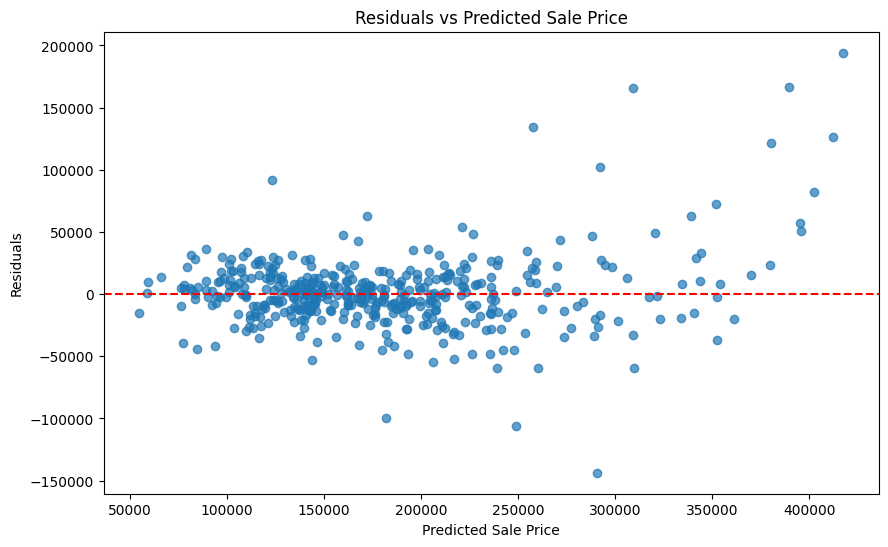

In [56]:
#### Residual Analysis for Ridge Regression ####
ridge_train_residuals = y_train - y_pred_train_ridge
ridge_test_residuals = y_test - y_pred_test_ridge
#### Scatter plot of residuals ####
plt.figure(figsize=(10,6))
plt.scatter(y_pred_test_ridge, ridge_test_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price")
plt.show()

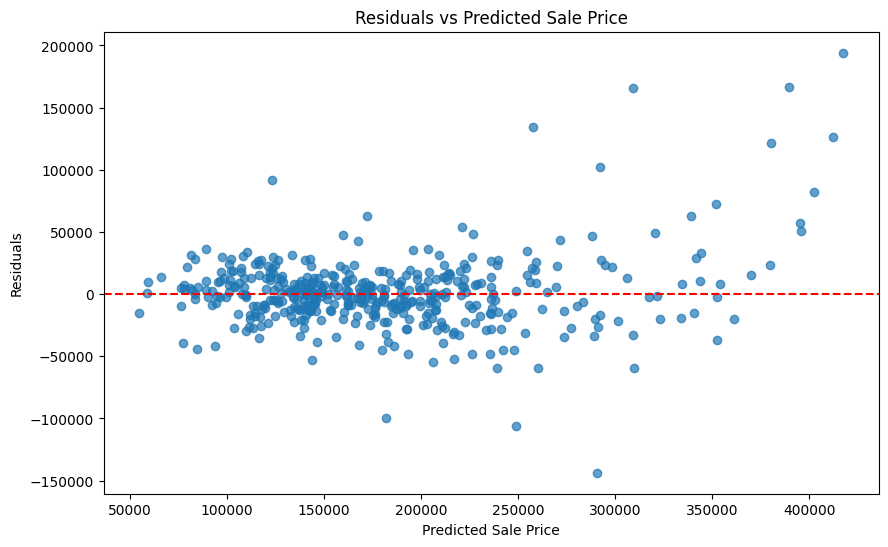

In [57]:
#### Lets do a scatter plot of residuals ####
plt.figure(figsize=(10,6))
plt.scatter(y_pred_test_ridge, ridge_test_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price")
plt.show()

##### Lasso Regression

In [58]:
#### Apply Lasso Regression based on selected columns from RFE ####
X_train_lasso = X_train
X_test_lasso = X_test

In [59]:
#### Set CV model for Lasso Regression
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Lasso()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,100


In [60]:
#### Get the best alpha value ####
lasso_alpha = model_cv.best_params_['alpha']
lasso_alpha

100

In [61]:
#### Build Lasso Regression model with best alpha value ####
lasso = Lasso(lasso_alpha)
lasso.fit(X_train_lasso, y_train)

,alpha,100
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [62]:
#### Top 10 important features from Lasso Regression ####
Lasso_coefficients = pd.Series(lasso.coef_, index=X_train_lasso.columns)
top_10_lasso_coefficients = Lasso_coefficients.abs().sort_values(ascending=False).head(10)
top_10_lasso_coefficients

GrLivArea               204225.947193
OverallQual              96410.460865
Neighborhood_NoRidge     51633.252931
GarageCars               43209.494032
OverallCond              34876.875037
2ndFlrSF                 34793.182677
Neighborhood_NridgHt     32426.755717
KitchenQual_TA           29395.491252
BsmtQual_Gd              28236.288251
KitchenQual_Gd           27275.441808
dtype: float64

In [63]:
#### Lets build Lasso regression metrics ####
y_pred_train_lasso = lasso.predict(X_train_lasso)
y_pred_test_lasso = lasso.predict(X_test_lasso)

Lasso_metrics = []
r2_train_lasso = r2_score(y_train,y_pred_train_lasso)
print(r2_train_lasso)
Lasso_metrics.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test,y_pred_test_lasso)
print(r2_test_lasso)
Lasso_metrics.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss_train_lasso)
Lasso_metrics.append(rss_train_lasso)
    
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss_test_lasso)
Lasso_metrics.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train,y_pred_train_lasso)
print(mse_train_lasso)
Lasso_metrics.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test,y_pred_test_lasso)
print(mse_test_lasso)
Lasso_metrics.append(mse_test_lasso)

0.8842220360276326
0.8611138057102861
739667688025.7357
391480256137.08563
723745291.6103089
893790539.1257663


In [64]:
#### Lets get the Residuals for Lasso Regression ####
lasso_train_residuals = y_train - y_pred_train_lasso
lasso_test_residuals = y_test - y_pred_test_lasso

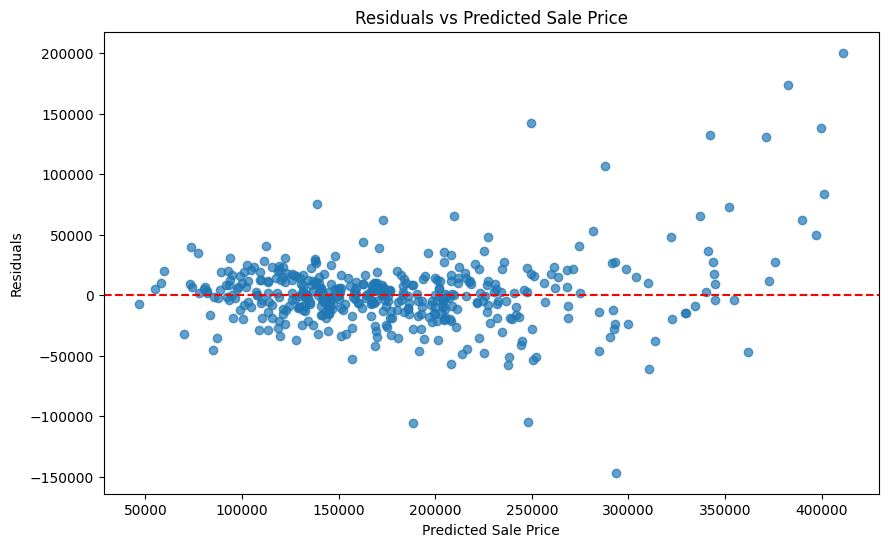

In [65]:
#### Residual Analysis for Lasso Regression ####
plt.figure(figsize=(10,6))
plt.scatter(y_pred_test_lasso, lasso_test_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price")
plt.show()

In [66]:
#### Lets build a Regression Metrics DataFrame to compare all models ####
regression_metrics = pd.DataFrame({
    'Metric': ['R2_Train', 'R2_Test', 'RSS_Train', 'RSS_Test', 'RMSE_Train', 'RMSE_Test'],
    'Ridge_Regression': Ridge_metrics,
    'Lasso_Regression': Lasso_metrics
})
regression_metrics

,Metric,Ridge_Regression,Lasso_Regression
0,R2_Train,8.858698e-01,8.842220e-01
1,R2_Test,8.620399e-01,8.611138e-01
2,RSS_Train,7.291410e+11,7.396677e+11
3,RSS_Test,3.888698e+11,3.914803e+11
4,RMSE_Train,2.671039e+04,7.237453e+08
5,RMSE_Test,2.979649e+04,8.937905e+08


## Assignment Part-II

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Lasso: 100

Ridge: 5

In [67]:
ridge_alpha, lasso_alpha

(5.0, 100)

#### Doubling Alpha of both Lasso and Ridge

In [68]:
#### Doubling the Alpha value for Ridge to see the effect on coefficients ####
ridge_2alpha = ridge_alpha * 2
ridge2_alpha = Ridge(ridge_2alpha)
print(ridge_2alpha)
ridge2_alpha.fit(X_train_ridge, y_train)

#### Lets build Ridge regression metrics ####
y_pred_train_ridge2 = ridge2_alpha.predict(X_train_ridge)
y_pred_test_ridge2 = ridge2_alpha.predict(X_test_ridge)
Ridge2_metrics = []

r2_train_ridge2 = r2_score(y_train,y_pred_train_ridge2)
print(r2_train_ridge2)
Ridge2_metrics.append(r2_train_ridge2)

r2_test_ridge2 = r2_score(y_test,y_pred_test_ridge2)
print(r2_test_ridge2)
Ridge2_metrics.append(r2_test_ridge2)

rss_train_ridge2 = np.sum(np.square(y_train - y_pred_train_ridge2))
print(rss_train_ridge2)
Ridge2_metrics.append(rss_train_ridge2)

rss_test_ridge2 = np.sum(np.square(y_test - y_pred_test_ridge2))
print(rss_test_ridge2)
Ridge2_metrics.append(rss_test_ridge2)

mse_train_ridge2 = mean_squared_error(y_train,y_pred_train_ridge2)
print(mse_train_ridge2)
Ridge2_metrics.append(mse_train_ridge2**0.5)

mse_test_ridge2 = mean_squared_error(y_test,y_pred_test_ridge2)
print(mse_test_ridge2)
Ridge2_metrics.append(mse_test_ridge2**0.5)

10.0
0.8758307162967817
0.8569252784877294
793277095652.6017
403286510303.0198
776200680.6776924
920745457.3128306


In [69]:
#### Doubling the Alpha value for Lasso to see the effect on coefficients ####
lasso_2alpha = lasso_alpha * 2
lasso2_alpha = Lasso(lasso_2alpha)
print(lasso_2alpha)
lasso2_alpha.fit(X_train_lasso, y_train)

#### Lets build Lasso regression metrics ####
y_pred_train_lasso2 = lasso2_alpha.predict(X_train_lasso)
y_pred_test_lasso2 = lasso2_alpha.predict(X_test_lasso)

Lasso2_metrics = []
r2_train_lasso2 = r2_score(y_train,y_pred_train_lasso2)
print(r2_train_lasso2)
Lasso2_metrics.append(r2_train_lasso2)

r2_test_lasso2 = r2_score(y_test,y_pred_test_lasso2)
print(r2_test_lasso2)
Lasso2_metrics.append(r2_test_lasso2)

rss_train_lasso2 = np.sum(np.square(y_train - y_pred_train_lasso2))
print(rss_train_lasso2)
Lasso2_metrics.append(rss_train_lasso2)

rss_test_lasso2 = np.sum(np.square(y_test - y_pred_test_lasso2))
print(rss_test_lasso2)
Lasso2_metrics.append(rss_test_lasso2)

mse_train_lasso2 = mean_squared_error(y_train,y_pred_train_lasso2)
print(mse_train_lasso2)
Lasso2_metrics.append(mse_train_lasso2**0.5)

mse_test_lasso2 = mean_squared_error(y_test,y_pred_test_lasso2)
print(mse_test_lasso2)
Lasso2_metrics.append(mse_test_lasso2**0.5)

200
0.8724588909292277
0.8534804098537421
814818589288.1301
412996604687.05035
797278463.0999316
942914622.5731744


In [70]:
#### Lets build a Regression Metrics DataFrame to compare all models ####
regression_metrics = pd.DataFrame({
    'Metric': ['R2_Train', 'R2_Test', 'RSS_Train', 'RSS_Test', 'RMSE_Train', 'RMSE_Test'],
    'Ridge_Regression': Ridge_metrics,
    'Lasso_Regression': Lasso_metrics,
    'Ridge_2Alpha': Ridge2_metrics,
    'Lasso_2Alpha': Lasso2_metrics
})
regression_metrics

,Metric,Ridge_Regression,Lasso_Regression,Ridge_2Alpha,Lasso_2Alpha
0,R2_Train,8.858698e-01,8.842220e-01,8.758307e-01,8.724589e-01
1,R2_Test,8.620399e-01,8.611138e-01,8.569253e-01,8.534804e-01
2,RSS_Train,7.291410e+11,7.396677e+11,7.932771e+11,8.148186e+11
3,RSS_Test,3.888698e+11,3.914803e+11,4.032865e+11,4.129966e+11
4,RMSE_Train,2.671039e+04,7.237453e+08,2.786038e+04,2.823612e+04
5,RMSE_Test,2.979649e+04,8.937905e+08,3.034379e+04,3.070691e+04


In [71]:
#### Top 10 important features from Lasso Regression ####
top_10_lasso_coefficients


GrLivArea               204225.947193
OverallQual              96410.460865
Neighborhood_NoRidge     51633.252931
GarageCars               43209.494032
OverallCond              34876.875037
2ndFlrSF                 34793.182677
Neighborhood_NridgHt     32426.755717
KitchenQual_TA           29395.491252
BsmtQual_Gd              28236.288251
KitchenQual_Gd           27275.441808
dtype: float64

In [72]:
#### Top 10 important features from Lasso Regression ####
top_10_ridge_coefficients

OverallQual             63287.641497
2ndFlrSF                56813.428762
GrLivArea               54160.283027
Neighborhood_NoRidge    46221.799782
1stFlrSF                38624.830548
GarageCars              33638.034787
FullBath                30338.146262
OverallCond             29729.058821
BsmtQual_Gd             28792.305221
TotRmsAbvGrd            28377.374035
dtype: float64

In [73]:
#### Top 10 important features from Lasso Regression2 ####
top_10_lasso_coefficients2 = pd.Series(lasso2_alpha.coef_, index=X_train_lasso.columns)
top_10_lasso_coefficients2 = top_10_lasso_coefficients2.abs().sort_values(ascending=False).head(10)
top_10_lasso_coefficients2

GrLivArea               202685.114394
OverallQual             107687.831155
Neighborhood_NoRidge     50654.812269
GarageCars               41841.835393
Neighborhood_NridgHt     29894.781390
OverallCond              29273.238114
MSSubClass               26876.131910
KitchenQual_TA           26551.920261
KitchenQual_Gd           24036.633319
BsmtExposure_Gd          23716.274585
dtype: float64

In [74]:
#### Top 10 important features from Ridge Regression2 ####
top_10_ridge_coefficients2 = pd.Series(ridge2_alpha.coef_, index=X_train_ridge.columns)
top_10_ridge_coefficients2 = top_10_ridge_coefficients2.abs().sort_values(ascending=False).head(10)
top_10_ridge_coefficients2

OverallQual             53575.699877
2ndFlrSF                43486.472683
GrLivArea               42884.011652
Neighborhood_NoRidge    42094.112669
1stFlrSF                31228.153840
GarageCars              29493.254561
FullBath                29153.155629
TotRmsAbvGrd            28599.021682
BsmtQual_Gd             26394.074660
KitchenQual_TA          25899.124726
dtype: float64

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [75]:
#### Top 5 features
top_5_lasso_features = top_10_lasso_coefficients2.index[:5].tolist()
top_5_lasso_features

['GrLivArea',
 'OverallQual',
 'Neighborhood_NoRidge',
 'GarageCars',
 'Neighborhood_NridgHt']

In [76]:
#### Drop the top 5 important features from Lasso Regression and rebuild the model ####
X_train_lasso_5drop = X_train_lasso.drop(columns=top_5_lasso_features)
X_test_lasso_5drop = X_test_lasso.drop(columns=top_5_lasso_features)
X_train_lasso_5drop.shape, X_test_lasso_5drop.shape

((1022, 196), (438, 196))

In [77]:
#### Let build Lasso Regression model for dropped top 5 features ####
lasso_5drop = Lasso(lasso_alpha)
print(lasso_alpha)
lasso_5drop.fit(X_train_lasso_5drop, y_train)

#### Lets build Lasso regression metrics ####
y_pred_train_lasso5drop = lasso_5drop.predict(X_train_lasso_5drop)
y_pred_test_lasso5drop = lasso_5drop.predict(X_test_lasso_5drop)

Lasso5drop_metrics = []
r2_train_lasso5drop = r2_score(y_train,y_pred_train_lasso5drop)
print(r2_train_lasso5drop)
Lasso5drop_metrics.append(r2_train_lasso5drop)

r2_test_lasso5drop = r2_score(y_test,y_pred_test_lasso5drop)
print(r2_test_lasso5drop)
Lasso5drop_metrics.append(r2_test_lasso5drop)

rss_train_lasso5drop = np.sum(np.square(y_train - y_pred_train_lasso5drop))
print(rss_train_lasso5drop)
Lasso5drop_metrics.append(rss_train_lasso5drop)

rss_test_lasso5drop = np.sum(np.square(y_test - y_pred_test_lasso5drop))
print(rss_test_lasso5drop)
Lasso5drop_metrics.append(rss_test_lasso5drop)

mse_train_lasso5drop = mean_squared_error(y_train,y_pred_train_lasso5drop)
print(mse_train_lasso5drop)
Lasso5drop_metrics.append(mse_train_lasso5drop**0.5)

mse_test_lasso5drop = mean_squared_error(y_test,y_pred_test_lasso5drop)
print(mse_test_lasso5drop)
Lasso5drop_metrics.append(mse_test_lasso5drop**0.5)


100
0.8692847554839601
0.8454161285753846
835097106423.2379
435727495374.6261
817120456.382816
994811633.2754021


In [78]:
#### Top 10 important features from Lasso Regression model after dropping top 5 features ####
top_10_lasso_coefficients_5drop = pd.Series(lasso_5drop.coef_, index=X_train_lasso_5drop.columns)
top_10_lasso_coefficients_5drop = top_10_lasso_coefficients_5drop.abs().sort_values(ascending=False).head(10)
top_10_lasso_coefficients_5drop

1stFlrSF                193947.525233
2ndFlrSF                140120.069367
GarageArea               44836.234198
OverallCond              42702.258614
MasVnrArea               39140.154095
KitchenQual_TA           37413.668154
KitchenQual_Fa           34656.635665
KitchenQual_Gd           34588.257797
Property_Age             34537.847624
Neighborhood_Edwards     33773.833169
dtype: float64